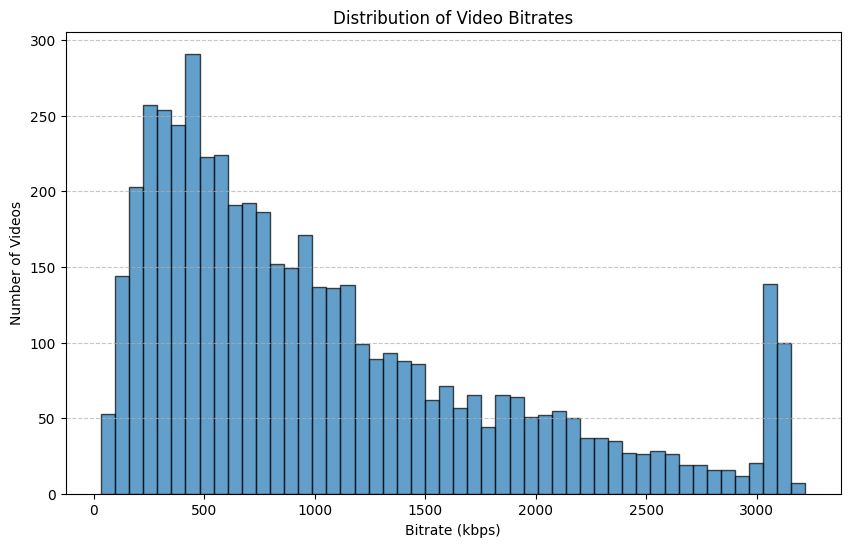

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
file_path = "video_bitrate.txt"
df = pd.read_csv(file_path, sep=" ", header=None, names=["path", "bitrate_kbps"], usecols=[0, 1])

# 转换数据类型
df["bitrate_kbps"] = df["bitrate_kbps"].astype(float)

# 绘制码率分布直方图
plt.figure(figsize=(10, 6))
plt.hist(df["bitrate_kbps"], bins=50, edgecolor="black", alpha=0.7)
plt.xlabel("Bitrate (kbps)")
plt.ylabel("Number of Videos")
plt.title("Distribution of Video Bitrates")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# 显示图表
plt.show()

In [ ]:
import pandas as pd
import os

# 读取视频码率数据
file_path = "video_bitrate.txt"
df = pd.read_csv(file_path, sep=" ", header=None, names=["path", "bitrate_kbps"], usecols=[0, 1])

# 转换数据类型
df["bitrate_kbps"] = df["bitrate_kbps"].astype(float)

### **📌 方法 1：手动分桶**
bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, float("inf")]  # 码率区间
labels = [
    "Low (<500 kbps)", "Medium-Low (500-1000 kbps)", "Medium (1000-1500 kbps)", "Medium (1500-2000 kbps)",
    "High (2000-2500 kbps)", "High (2500-3000 kbps)", "High (3000-3500 kbps)", "High (3500-4000 kbps)", "Ultra High (>4000 kbps)"
]

df["bucket"] = pd.cut(df["bitrate_kbps"], bins=bins, labels=labels, right=True)

### **📌 方法 2：等宽分桶（10个区间）**
df["equal_width_bin"] = pd.cut(df["bitrate_kbps"], bins=10)

### **📌 方法 3：等频分桶（5个区间，每个桶大小相等）**
df["equal_freq_bin"] = pd.qcut(df["bitrate_kbps"], q=5, duplicates='drop')

# 显示桶的统计信息
bucket_counts = df["bucket"].value_counts().sort_index()

print("📊 视频码率分桶统计：")
print(bucket_counts)

# 按桶将视频路径分别保存到不同的文件中
output_dir = "video_buckets"
os.makedirs(output_dir, exist_ok=True)

# 新做法：遍历预先定义的所有桶标签
for bucket_label in labels:
    bucket_videos = df[df["bucket"] == bucket_label]["path"]

    # 统一处理：把特殊字符替换成下划线等
    bucket_filename = os.path.join(
        output_dir,
        f"{bucket_label.replace(' ', '_').replace('<', '').replace('>', '').replace('(', '').replace(')', '').replace('-', '_')}.txt"
    )

    bucket_videos.to_csv(bucket_filename, index=False, header=False)
    print(f"✅ 已保存 {len(bucket_videos)} 个视频到 {bucket_filename}")


📊 视频码率分桶统计：
bucket
Low (<500 kbps)               1525
Medium-Low (500-1000 kbps)    1429
Medium (1000-1500 kbps)        847
Medium (1500-2000 kbps)        473
High (2000-2500 kbps)          315
High (2500-3000 kbps)          153
High (3000-3500 kbps)          258
High (3500-4000 kbps)            0
Ultra High (>4000 kbps)          0
Name: count, dtype: int64
✅ 已保存 847 个视频到 video_buckets/Medium_1000_1500_kbps.txt
✅ 已保存 1429 个视频到 video_buckets/Medium_Low_500_1000_kbps.txt
✅ 已保存 1525 个视频到 video_buckets/Low_500_kbps.txt
✅ 已保存 258 个视频到 video_buckets/High_3000_3500_kbps.txt
✅ 已保存 153 个视频到 video_buckets/High_2500_3000_kbps.txt
✅ 已保存 315 个视频到 video_buckets/High_2000_2500_kbps.txt
✅ 已保存 473 个视频到 video_buckets/Medium_1500_2000_kbps.txt


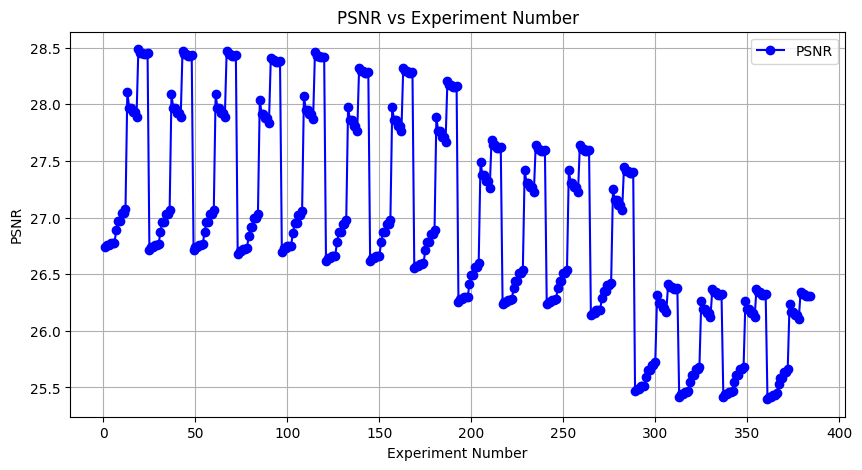

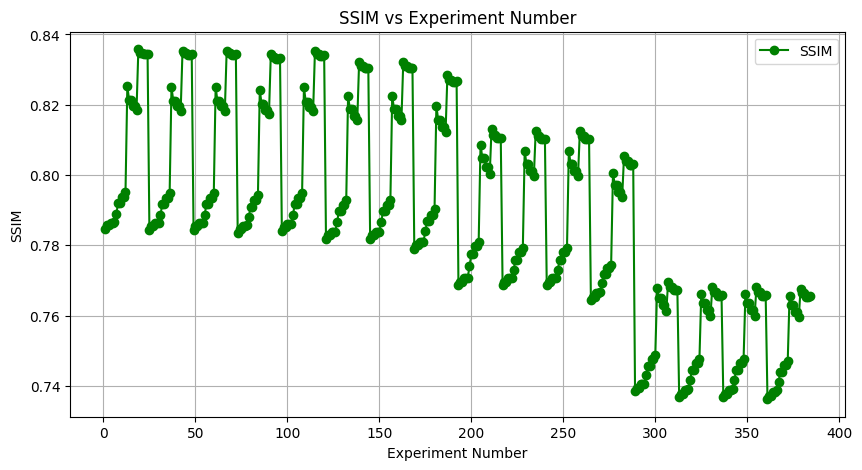

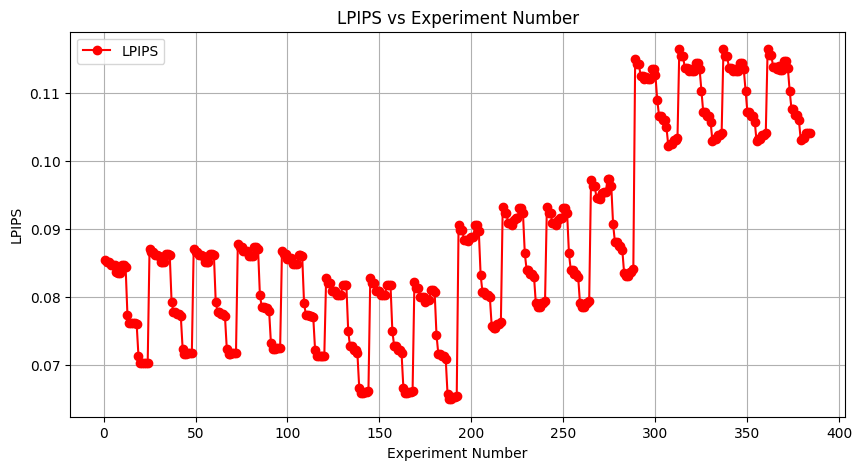

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 确保路径正确
metrics_dir = "/mnt/public/wangsiyuan/HunyuanVideo_efficiency/analysis/one_true_pool_metrics"

if not os.path.exists(metrics_dir):
    raise FileNotFoundError(f"❌ 目录不存在: {metrics_dir}，请检查路径是否正确！")

# 存储数据
data = []

# 遍历每个 exp 目录
for exp_folder in sorted(os.listdir(metrics_dir), key=lambda x: int(x.replace("exp_", "")) if x.startswith("exp_") else float("inf")):
    exp_path = os.path.join(metrics_dir, exp_folder)
    if os.path.isdir(exp_path):
        # 找到 txt 文件
        for file in os.listdir(exp_path):
            if file.endswith(".txt"):
                file_path = os.path.join(exp_path, file)
                with open(file_path, "r") as f:
                    content = f.readlines()
                    # 解析 PSNR, SSIM, LPIPS
                    psnr = float(content[4].split(":")[1].strip())  # PSNR 在第 5 行（索引 4）
                    ssim = float(content[5].split(":")[1].strip())  # SSIM 在第 6 行（索引 5）
                    lpips = float(content[6].split(":")[1].strip()) # LPIPS 在第 7 行（索引 6）
                    exp_number = int(exp_folder.replace("exp_", ""))
                    data.append([exp_number, psnr, ssim, lpips])

# 转换为 DataFrame
df = pd.DataFrame(data, columns=["exp", "PSNR", "SSIM", "LPIPS"])
df = df.sort_values("exp")

# 画 PSNR 图
plt.figure(figsize=(10, 5))
plt.plot(df["exp"], df["PSNR"], marker="o", linestyle="-", label="PSNR", color="blue")
plt.xlabel("Experiment Number")
plt.ylabel("PSNR")
plt.title("PSNR vs Experiment Number")
plt.grid(True)
plt.legend()
plt.show()

# 画 SSIM 图
plt.figure(figsize=(10, 5))
plt.plot(df["exp"], df["SSIM"], marker="o", linestyle="-", label="SSIM", color="green")
plt.xlabel("Experiment Number")
plt.ylabel("SSIM")
plt.title("SSIM vs Experiment Number")
plt.grid(True)
plt.legend()
plt.show()

# 画 LPIPS 图
plt.figure(figsize=(10, 5))
plt.plot(df["exp"], df["LPIPS"], marker="o", linestyle="-", label="LPIPS", color="red")
plt.xlabel("Experiment Number")
plt.ylabel("LPIPS")
plt.title("LPIPS vs Experiment Number")
plt.grid(True)
plt.legend()
plt.show()


In [3]:
import pandas as pd

# 假设 df 已经包含了所有实验数据
# df = pd.DataFrame(data, columns=["exp", "PSNR", "SSIM", "LPIPS"])

# 1. 分别给 PSNR、SSIM、LPIPS 排名：
#    - PSNR, SSIM：值越大越好 -> ascending=False
#    - LPIPS     ：值越小越好 -> ascending=True

df["PSNR_rank"] = df["PSNR"].rank(method='dense', ascending=False)
df["SSIM_rank"] = df["SSIM"].rank(method='dense', ascending=False)
df["LPIPS_rank"] = df["LPIPS"].rank(method='dense', ascending=True)

# 2. 将排名分数求和，得到综合分数
df["total_rank"] = df["PSNR_rank"] + df["SSIM_rank"] + df["LPIPS_rank"]

# 3. 按综合分数排序
df = df.sort_values(by="total_rank")

# 4. 取出前 5 名
top_5 = df.head(5)

print("综合考虑 PSNR（大为好）、SSIM（大为好）、LPIPS（小为好），排名前五的实验为：")
print(top_5[["exp", "PSNR", "SSIM", "LPIPS", "PSNR_rank", "SSIM_rank", "LPIPS_rank", "total_rank"]])


综合考虑 PSNR（大为好）、SSIM（大为好）、LPIPS（小为好），排名前五的实验为：
    exp       PSNR      SSIM     LPIPS  PSNR_rank  SSIM_rank  LPIPS_rank  \
18   19  28.485743  0.835782  0.071319        1.0        1.0        15.0   
19   20  28.452957  0.834810  0.070299        4.0        4.0         9.0   
20   21  28.452957  0.834810  0.070299        4.0        4.0         9.0   
23   24  28.448560  0.834494  0.070329        5.0        6.0        10.0   
22   23  28.443308  0.834441  0.070337        6.0        8.0        11.0   

    total_rank  
18        17.0  
19        17.0  
20        17.0  
23        21.0  
22        25.0  


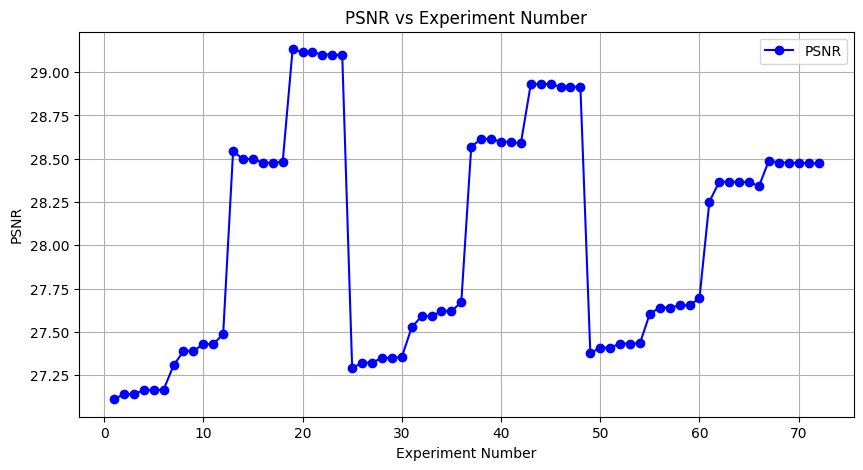

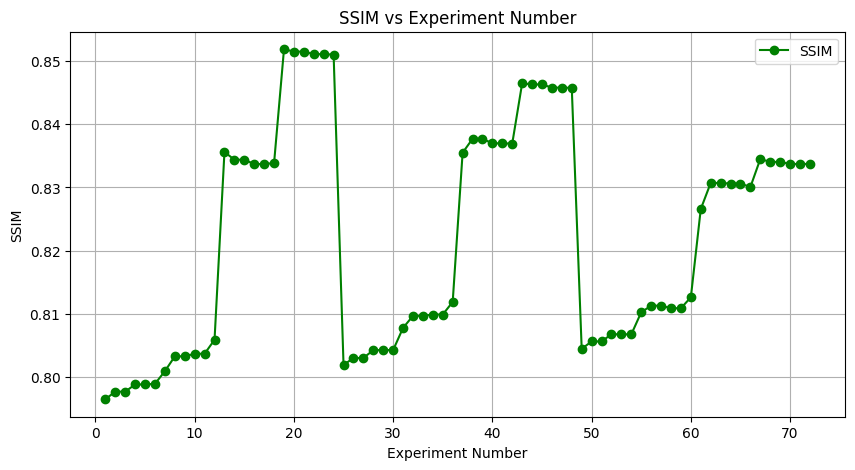

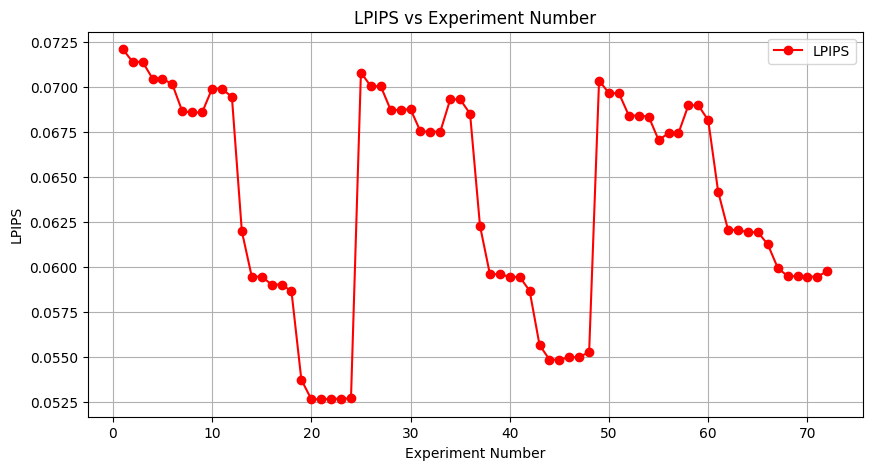

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 确保路径正确
metrics_dir = "/mnt/public/wangsiyuan/HunyuanVideo_efficiency/analysis/one_true_stride_metrics"

if not os.path.exists(metrics_dir):
    raise FileNotFoundError(f"❌ 目录不存在: {metrics_dir}，请检查路径是否正确！")

# 存储数据
data = []

# 遍历每个 exp 目录
for exp_folder in sorted(os.listdir(metrics_dir), key=lambda x: int(x.replace("exp_", "")) if x.startswith("exp_") else float("inf")):
    exp_path = os.path.join(metrics_dir, exp_folder)
    if os.path.isdir(exp_path):
        # 找到 txt 文件
        for file in os.listdir(exp_path):
            if file.endswith(".txt"):
                file_path = os.path.join(exp_path, file)
                with open(file_path, "r") as f:
                    content = f.readlines()
                    # 解析 PSNR, SSIM, LPIPS
                    psnr = float(content[4].split(":")[1].strip())  # PSNR 在第 5 行（索引 4）
                    ssim = float(content[5].split(":")[1].strip())  # SSIM 在第 6 行（索引 5）
                    lpips = float(content[6].split(":")[1].strip()) # LPIPS 在第 7 行（索引 6）
                    exp_number = int(exp_folder.replace("exp_", ""))
                    data.append([exp_number, psnr, ssim, lpips])

# 转换为 DataFrame
df = pd.DataFrame(data, columns=["exp", "PSNR", "SSIM", "LPIPS"])
df = df.sort_values("exp")

# 画 PSNR 图
plt.figure(figsize=(10, 5))
plt.plot(df["exp"], df["PSNR"], marker="o", linestyle="-", label="PSNR", color="blue")
plt.xlabel("Experiment Number")
plt.ylabel("PSNR")
plt.title("PSNR vs Experiment Number")
plt.grid(True)
plt.legend()
plt.show()

# 画 SSIM 图
plt.figure(figsize=(10, 5))
plt.plot(df["exp"], df["SSIM"], marker="o", linestyle="-", label="SSIM", color="green")
plt.xlabel("Experiment Number")
plt.ylabel("SSIM")
plt.title("SSIM vs Experiment Number")
plt.grid(True)
plt.legend()
plt.show()

# 画 LPIPS 图
plt.figure(figsize=(10, 5))
plt.plot(df["exp"], df["LPIPS"], marker="o", linestyle="-", label="LPIPS", color="red")
plt.xlabel("Experiment Number")
plt.ylabel("LPIPS")
plt.title("LPIPS vs Experiment Number")
plt.grid(True)
plt.legend()
plt.show()


In [6]:
import pandas as pd

# 假设 df 已经包含了所有实验数据
# df = pd.DataFrame(data, columns=["exp", "PSNR", "SSIM", "LPIPS"])

# 1. 分别给 PSNR、SSIM、LPIPS 排名：
#    - PSNR, SSIM：值越大越好 -> ascending=False
#    - LPIPS     ：值越小越好 -> ascending=True

df["PSNR_rank"] = df["PSNR"].rank(method='dense', ascending=False)
df["SSIM_rank"] = df["SSIM"].rank(method='dense', ascending=False)
df["LPIPS_rank"] = df["LPIPS"].rank(method='dense', ascending=True)

# 2. 将排名分数求和，得到综合分数
df["total_rank"] = df["PSNR_rank"] + df["SSIM_rank"] + df["LPIPS_rank"]

# 3. 按综合分数排序
df = df.sort_values(by="total_rank")

# 4. 取出前 5 名
top_5 = df.head(5)

print("综合考虑 PSNR（大为好）、SSIM（大为好）、LPIPS（小为好），排名前五的实验为：")
print(top_5[["exp", "PSNR", "SSIM", "LPIPS", "PSNR_rank", "SSIM_rank", "LPIPS_rank", "total_rank"]])


综合考虑 PSNR（大为好）、SSIM（大为好）、LPIPS（小为好），排名前五的实验为：
    exp       PSNR      SSIM     LPIPS  PSNR_rank  SSIM_rank  LPIPS_rank  \
19   20  29.115229  0.851478  0.052632        2.0        2.0         1.0   
20   21  29.115229  0.851478  0.052632        2.0        2.0         1.0   
18   19  29.132554  0.851853  0.053714        1.0        1.0         4.0   
21   22  29.101877  0.851073  0.052656        3.0        3.0         2.0   
22   23  29.101877  0.851073  0.052656        3.0        3.0         2.0   

    total_rank  
19         5.0  
20         5.0  
18         6.0  
21         8.0  
22         8.0  


✅ 解析 High_2500_3000_kbps 成功，实验数量: 72
✅ 解析 High_3000_3500_kbps 成功，实验数量: 72
✅ 解析 Low_500_kbps 成功，实验数量: 72
✅ 解析 Medium_1500_2000_kbps 成功，实验数量: 72


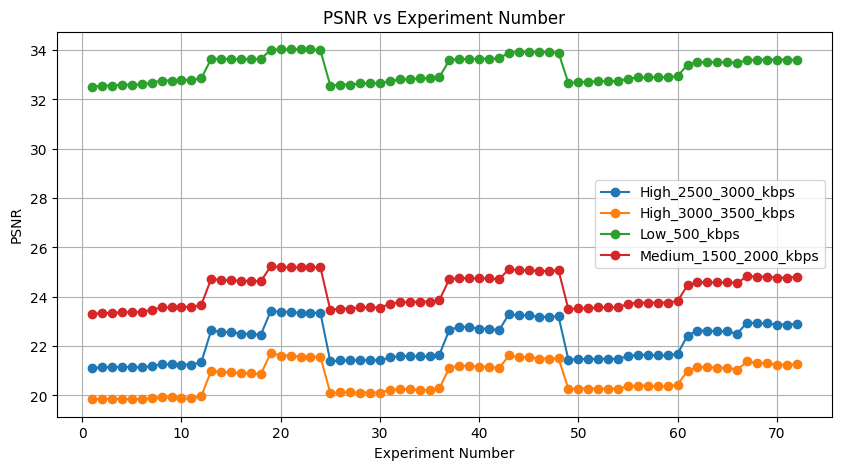

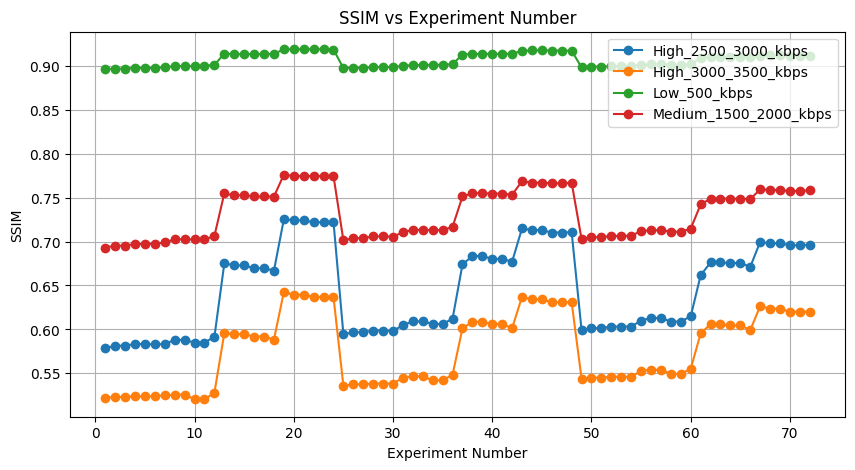

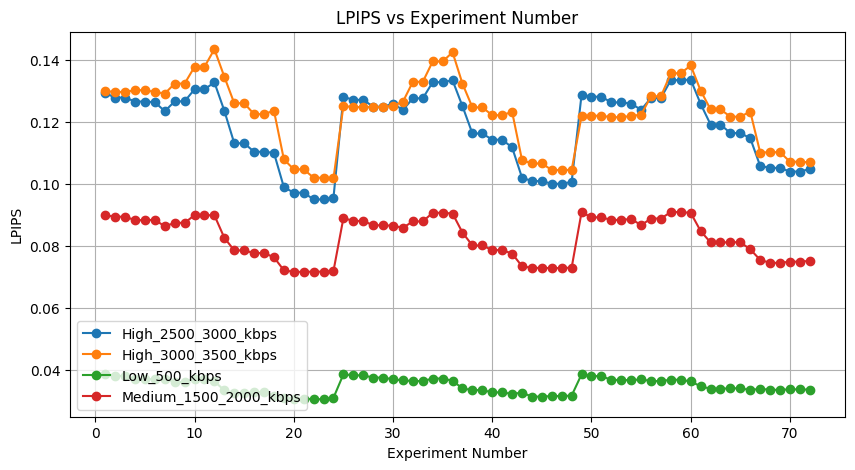

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 定义四个数据目录
metrics_dirs = {
    "High_2500_3000_kbps": "/home/hanling/HunyuanVideo_efficiency/analysis/pool_metrics/High_2500_3000_kbps",
    "High_3000_3500_kbps": "/home/hanling/HunyuanVideo_efficiency/analysis/pool_metrics/High_3000_3500_kbps",
    "Low_500_kbps": "/home/hanling/HunyuanVideo_efficiency/analysis/pool_metrics/Low_500_kbps",
    "Medium_1500_2000_kbps": "/home/hanling/HunyuanVideo_efficiency/analysis/pool_metrics/Medium_1500_2000_kbps",
}

# 存储所有数据
all_data = {key: [] for key in metrics_dirs.keys()}

# 遍历每个目录
for label, metrics_dir in metrics_dirs.items():
    if not os.path.exists(metrics_dir):
        print(f"❌ 目录不存在: {metrics_dir}，请检查路径是否正确！")
        continue

    # 遍历每个 exp 目录
    for exp_folder in sorted(os.listdir(metrics_dir), key=lambda x: int(x.replace("exp_", "")) if x.startswith("exp_") else float("inf")):
        exp_path = os.path.join(metrics_dir, exp_folder)
        if os.path.isdir(exp_path):
            # 找到 txt 文件
            for file in os.listdir(exp_path):
                if file.endswith(".txt"):
                    file_path = os.path.join(exp_path, file)
                    with open(file_path, "r") as f:
                        content = f.readlines()
                        try:
                            # 解析 PSNR, SSIM, LPIPS
                            psnr = float(content[4].split(":")[1].strip())  # PSNR 在第 5 行（索引 4）
                            ssim = float(content[5].split(":")[1].strip())  # SSIM 在第 6 行（索引 5）
                            lpips = float(content[6].split(":")[1].strip()) # LPIPS 在第 7 行（索引 6）
                            exp_number = int(exp_folder.replace("exp_", ""))
                            all_data[label].append([exp_number, psnr, ssim, lpips])
                        except (IndexError, ValueError) as e:
                            print(f"❌ 解析失败: {file_path}, 错误: {e}")

# 生成 DataFrame
dfs = {}
for key, data in all_data.items():
    if data:
        dfs[key] = pd.DataFrame(data, columns=["exp", "PSNR", "SSIM", "LPIPS"]).sort_values("exp")
        print(f"✅ 解析 {key} 成功，实验数量: {len(dfs[key])}")
    else:
        print(f"⚠️ 解析 {key} 失败，数据为空！")

# 画图函数
def plot_metric(metric, ylabel, title):
    plt.figure(figsize=(10, 5))
    has_data = False
    for label, df in dfs.items():
        if metric in df:
            plt.plot(df["exp"], df[metric], marker="o", linestyle="-", label=label)
            has_data = True
    plt.xlabel("Experiment Number")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.legend()
    if has_data:
        plt.show()
    else:
        print(f"⚠️ 没有可用的 {metric} 数据，跳过绘图。")

# 画 PSNR, SSIM, LPIPS 图
plot_metric("PSNR", "PSNR", "PSNR vs Experiment Number")
plot_metric("SSIM", "SSIM", "SSIM vs Experiment Number")
plot_metric("LPIPS", "LPIPS", "LPIPS vs Experiment Number")

✅ 解析 High_2500_3000_kbps 成功，实验数量: 381
✅ 解析 High_3000_3500_kbps 成功，实验数量: 384
✅ 解析 Low_500_kbps 成功，实验数量: 384
✅ 解析 Medium_1500_2000_kbps 成功，实验数量: 384


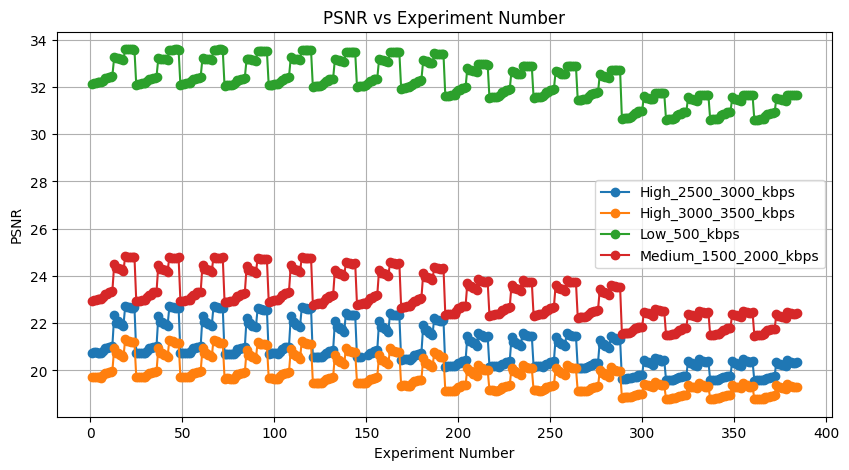

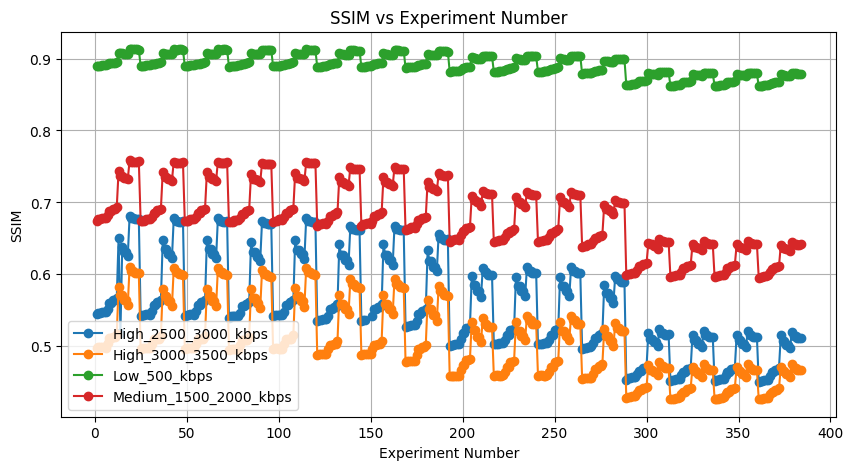

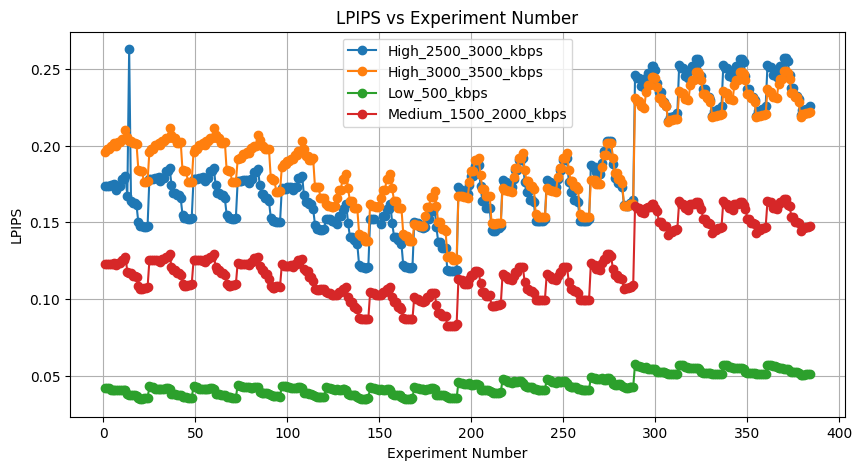

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 定义四个数据目录
metrics_dirs = {
    "High_2500_3000_kbps": "/home/hanling/HunyuanVideo_efficiency/analysis/pool_metrics/High_2500_3000_kbps",
    "High_3000_3500_kbps": "/home/hanling/HunyuanVideo_efficiency/analysis/pool_metrics/High_3000_3500_kbps",
    "Low_500_kbps": "/home/hanling/HunyuanVideo_efficiency/analysis/pool_metrics/Low_500_kbps",
    "Medium_1500_2000_kbps": "/home/hanling/HunyuanVideo_efficiency/analysis/pool_metrics/Medium_1500_2000_kbps",
}

# 存储所有数据
all_data = {key: [] for key in metrics_dirs.keys()}

# 遍历每个目录
for label, metrics_dir in metrics_dirs.items():
    if not os.path.exists(metrics_dir):
        print(f"❌ 目录不存在: {metrics_dir}，请检查路径是否正确！")
        continue

    # 遍历每个 exp 目录
    for exp_folder in sorted(os.listdir(metrics_dir), key=lambda x: int(x.replace("exp_", "")) if x.startswith("exp_") else float("inf")):
        exp_path = os.path.join(metrics_dir, exp_folder)
        if os.path.isdir(exp_path):
            # 找到 txt 文件
            for file in os.listdir(exp_path):
                if file.endswith(".txt"):
                    file_path = os.path.join(exp_path, file)
                    with open(file_path, "r") as f:
                        content = f.readlines()
                        try:
                            # 解析 PSNR, SSIM, LPIPS
                            psnr = float(content[4].split(":")[1].strip())  # PSNR 在第 5 行（索引 4）
                            ssim = float(content[5].split(":")[1].strip())  # SSIM 在第 6 行（索引 5）
                            lpips = float(content[6].split(":")[1].strip()) # LPIPS 在第 7 行（索引 6）
                            exp_number = int(exp_folder.replace("exp_", ""))
                            all_data[label].append([exp_number, psnr, ssim, lpips])
                        except (IndexError, ValueError) as e:
                            print(f"❌ 解析失败: {file_path}, 错误: {e}")

# 生成 DataFrame
dfs = {}
for key, data in all_data.items():
    if data:
        dfs[key] = pd.DataFrame(data, columns=["exp", "PSNR", "SSIM", "LPIPS"]).sort_values("exp")
        print(f"✅ 解析 {key} 成功，实验数量: {len(dfs[key])}")
    else:
        print(f"⚠️ 解析 {key} 失败，数据为空！")

# 画图函数
def plot_metric(metric, ylabel, title):
    plt.figure(figsize=(10, 5))
    has_data = False
    for label, df in dfs.items():
        if metric in df:
            plt.plot(df["exp"], df[metric], marker="o", linestyle="-", label=label)
            has_data = True
    plt.xlabel("Experiment Number")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.legend()
    if has_data:
        plt.show()
    else:
        print(f"⚠️ 没有可用的 {metric} 数据，跳过绘图。")

# 画 PSNR, SSIM, LPIPS 图
plot_metric("PSNR", "PSNR", "PSNR vs Experiment Number")
plot_metric("SSIM", "SSIM", "SSIM vs Experiment Number")
plot_metric("LPIPS", "LPIPS", "LPIPS vs Experiment Number")

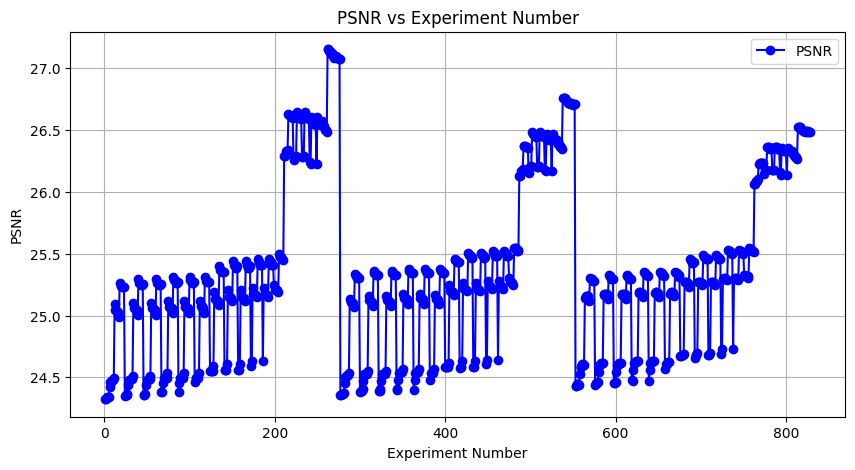

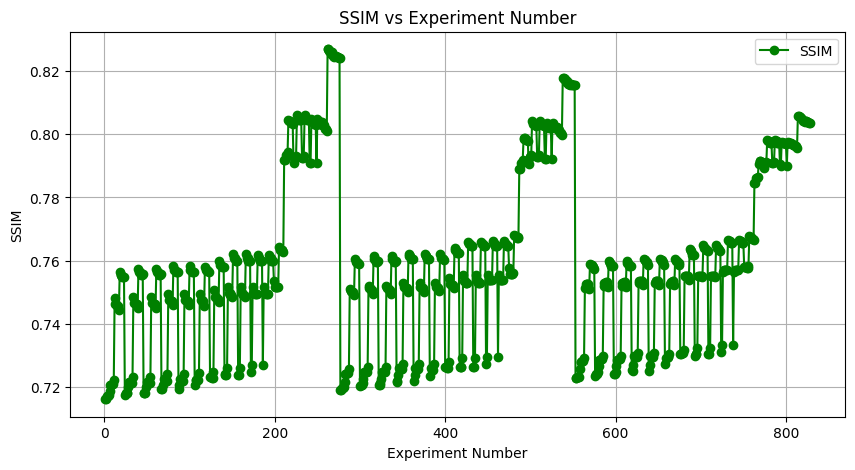

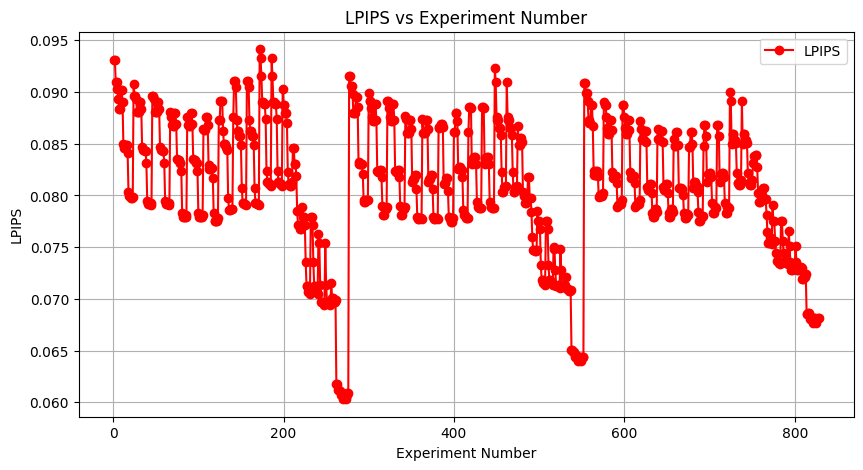

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 确保路径正确
metrics_dir = "/mnt/public/wangsiyuan/HunyuanVideo_efficiency/analysis/two_true_stride_metrics"

if not os.path.exists(metrics_dir):
    raise FileNotFoundError(f"❌ 目录不存在: {metrics_dir}，请检查路径是否正确！")

# 存储数据
data = []

# 遍历每个 exp 目录
for exp_folder in sorted(os.listdir(metrics_dir), key=lambda x: int(x.replace("exp_", "")) if x.startswith("exp_") else float("inf")):
    exp_path = os.path.join(metrics_dir, exp_folder)
    if os.path.isdir(exp_path):
        # 找到 txt 文件
        for file in os.listdir(exp_path):
            if file.endswith(".txt"):
                file_path = os.path.join(exp_path, file)
                with open(file_path, "r") as f:
                    content = f.readlines()
                    # 解析 PSNR, SSIM, LPIPS
                    psnr = float(content[4].split(":")[1].strip())  # PSNR 在第 5 行（索引 4）
                    ssim = float(content[5].split(":")[1].strip())  # SSIM 在第 6 行（索引 5）
                    lpips = float(content[6].split(":")[1].strip()) # LPIPS 在第 7 行（索引 6）
                    exp_number = int(exp_folder.replace("exp_", ""))
                    data.append([exp_number, psnr, ssim, lpips])

# 转换为 DataFrame
df = pd.DataFrame(data, columns=["exp", "PSNR", "SSIM", "LPIPS"])
df = df.sort_values("exp")

# 画 PSNR 图
plt.figure(figsize=(10, 5))
plt.plot(df["exp"], df["PSNR"], marker="o", linestyle="-", label="PSNR", color="blue")
plt.xlabel("Experiment Number")
plt.ylabel("PSNR")
plt.title("PSNR vs Experiment Number")
plt.grid(True)
plt.legend()
plt.show()

# 画 SSIM 图
plt.figure(figsize=(10, 5))
plt.plot(df["exp"], df["SSIM"], marker="o", linestyle="-", label="SSIM", color="green")
plt.xlabel("Experiment Number")
plt.ylabel("SSIM")
plt.title("SSIM vs Experiment Number")
plt.grid(True)
plt.legend()
plt.show()

# 画 LPIPS 图
plt.figure(figsize=(10, 5))
plt.plot(df["exp"], df["LPIPS"], marker="o", linestyle="-", label="LPIPS", color="red")
plt.xlabel("Experiment Number")
plt.ylabel("LPIPS")
plt.title("LPIPS vs Experiment Number")
plt.grid(True)
plt.legend()
plt.show()


In [6]:
import pandas as pd

# 假设 df 已经包含了所有实验数据
# df = pd.DataFrame(data, columns=["exp", "PSNR", "SSIM", "LPIPS"])

# 1. 分别给 PSNR、SSIM、LPIPS 排名：
#    - PSNR, SSIM：值越大越好 -> ascending=False
#    - LPIPS     ：值越小越好 -> ascending=True

df["PSNR_rank"] = df["PSNR"].rank(method='dense', ascending=False)
df["SSIM_rank"] = df["SSIM"].rank(method='dense', ascending=False)
df["LPIPS_rank"] = df["LPIPS"].rank(method='dense', ascending=True)

# 2. 将排名分数求和，得到综合分数
df["total_rank"] = df["PSNR_rank"] + df["SSIM_rank"] + df["LPIPS_rank"]

# 3. 按综合分数排序
df = df.sort_values(by="total_rank")

# 4. 取出前 5 名
top_5 = df.head(5)

print("综合考虑 PSNR（大为好）、SSIM（大为好）、LPIPS（小为好），排名前五的实验为：")
print(top_5[["exp", "PSNR", "SSIM", "LPIPS", "PSNR_rank", "SSIM_rank", "LPIPS_rank", "total_rank"]])


综合考虑 PSNR（大为好）、SSIM（大为好）、LPIPS（小为好），排名前五的实验为：
     exp       PSNR      SSIM     LPIPS  PSNR_rank  SSIM_rank  LPIPS_rank  \
261  262  27.153325  0.826807  0.061804        1.0        1.0         8.0   
262  263  27.153325  0.826807  0.061804        1.0        1.0         8.0   
263  264  27.139139  0.826228  0.061207        2.0        2.0         7.0   
266  267  27.119177  0.825777  0.060971        3.0        3.0         5.0   
264  265  27.139139  0.826228  0.061207        2.0        2.0         7.0   

     total_rank  
261        10.0  
262        10.0  
263        11.0  
266        11.0  
264        11.0  


In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# 1D 因果卷积（非对称填充实现）
class CausalConv1D(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride):
        super(CausalConv1D, self).__init__()
        self.kernel_size = kernel_size
        self.stride = stride
        self.padding = kernel_size - 1  # 计算左侧填充量 (右侧填充为0)

        # 这里 padding=0，因为我们会手动填充
        self.conv = nn.Conv1d(in_channels, out_channels, kernel_size, stride=stride, padding=0)

    def forward(self, x):
        # 进行非对称填充 (左填充 `kernel_size-1`, 右填充 `0`)
        x = F.pad(x, (self.padding, 0))  # 仅在左侧填充
        out = self.conv(x)
        return out

# **测试代码**
# 创建输入数据（Batch=1, Channels=1, Length=6）
x = torch.tensor([[1, 2, 3, 4, 5, 6]], dtype=torch.float32).unsqueeze(0)  # [1, 1, 6]
print("输入数据形状:", x.shape)  # 预期 [1, 1, 6]

# **初始化因果卷积**
kernel_size = 3
stride = 2
model = CausalConv1D(in_channels=1, out_channels=1, kernel_size=kernel_size, stride=stride)

# **计算输出**
y = model(x)

print("输出数据形状:", y.shape)  # 观察输出形状
print("输出数据:", y.squeeze().detach().numpy())  # 打印输出数据


输入数据形状: torch.Size([1, 1, 6])
输出数据形状: torch.Size([1, 1, 3])
输出数据: [-0.5160867 -1.3366662 -1.8869132]


In [22]:
import os
import tempfile
import subprocess
import math
import torch
import numpy as np
import imageio.v3 as iio  # 需要安装 imageio
from skimage.metrics import structural_similarity as ssim_metric
import matplotlib.pyplot as plt
from tqdm import tqdm

def compute_tile_metrics(video_tensor: torch.Tensor, fps: int = 25):
    # 原有的 SSIM/PSNR/码率
    avg_ssim = _compute_tile_ssim(video_tensor)
    avg_psnr = _compute_tile_psnr(video_tensor)
    bit_rate_kbps = _compute_tile_bitrate(video_tensor, fps=fps)

    # 额外的熵
    avg_intra_entropy = compute_tile_entropy_intraframe(video_tensor)
    avg_inter_entropy = compute_tile_entropy_interframe(video_tensor)

    return avg_ssim, avg_psnr, bit_rate_kbps, avg_intra_entropy, avg_inter_entropy



def _compute_tile_ssim(tile: torch.Tensor) -> float:
    """
    计算 tile 中相邻帧的平均 SSIM.
    tile shape: [B, C, T, H, W], 默认 B=1, C=3.
    返回: 0~1之间的 float, 越大表示帧间越相似.
    """
    tile = tile[0]  # => [C, T, H, W]
    c, t, h, w = tile.shape
    # 若有多于3通道，可根据需要处理，这里先截取前3通道
    if c > 3:
        tile = tile[:3]
        c = 3

    # 转成 numpy: [T, H, W, C]
    tile_np = tile.permute(1, 2, 3, 0).detach().cpu().numpy()  # => [T,H,W,C]

    ssim_values = []
    for i in range(t - 1):
        frame_a = tile_np[i]
        frame_b = tile_np[i + 1]
        # skimage ssim: 如果是多通道彩色图，需要 multichannel=True
        ssim_val = ssim_metric(
            frame_a, 
            frame_b, 
            channel_axis=-1,
            data_range=frame_b.max() - frame_b.min()
        )
        ssim_values.append(ssim_val)

    if not ssim_values:
        return 1.0  # 只有1帧或0帧的情况
    
    return float(np.mean(ssim_values))


def _compute_tile_psnr(tile: torch.Tensor) -> float:
    """
    对 tile 中相邻帧计算 PSNR 后取平均.
    tile shape: [B, C, T, H, W], 默认 B=1.
    返回: float, 表示平均 PSNR (dB).
    """
    tile = tile[0]  # => [C, T, H, W]
    c, t, h, w = tile.shape
    if c > 3:
        tile = tile[:3]

    tile_np = tile.permute(1, 2, 3, 0).detach().cpu().numpy()  # => [T,H,W,C]

    psnr_list = []
    for i in range(t - 1):
        frame_a = tile_np[i].astype(np.float32)
        frame_b = tile_np[i + 1].astype(np.float32)
        mse = np.mean((frame_a - frame_b) ** 2)
        if mse < 1e-10:
            psnr_val = 100.0  # 视为无穷大, 人为设个上限
        else:
            # 假设像素范围 [0,255]
            max_pixel = 1.0
            psnr_val = 20 * math.log10(max_pixel / math.sqrt(mse))
        psnr_list.append(psnr_val)

    if not psnr_list:
        return 100.0

    return float(np.mean(psnr_list))

def compute_tile_entropy_interframe(video_tensor: torch.Tensor) -> float:
    """
    计算视频张量的帧间差异熵（适配输入范围为 [-1, 1] 的情况）
    """
    video_tensor = video_tensor[0]  # => [C, T, H, W]
    c, t, h, w = video_tensor.shape

    if c > 3:
        video_tensor = video_tensor[:3]

    video_np = video_tensor.permute(1, 2, 3, 0).detach().cpu().numpy()  # => [T, H, W, C]
    
    diff_entropies = []
    for i in range(t - 1):
        frame_a = video_np[i]      # [H, W, C]
        frame_b = video_np[i + 1]  # [H, W, C]

        # ------------ 关键修改点 ------------
        # 将 [-1, 1] 的输入映射到 [0, 255] 的 uint8
        frame_a = (frame_a + 1.0) * 0.5 * 255.0  # 映射到 [0, 255]
        frame_a = np.clip(frame_a, 0, 255).astype(np.uint8)
        frame_b = (frame_b + 1.0) * 0.5 * 255.0
        frame_b = np.clip(frame_b, 0, 255).astype(np.uint8)

        # 转灰度（原逻辑保持）
        if frame_a.shape[-1] == 3:
            gray_a = 0.299 * frame_a[..., 0] + 0.587 * frame_a[..., 1] + 0.114 * frame_a[..., 2]
            gray_b = 0.299 * frame_b[..., 0] + 0.587 * frame_b[..., 1] + 0.114 * frame_b[..., 2]
        else:
            gray_a = frame_a[..., 0]
            gray_b = frame_b[..., 0]

        # 计算差分（uint8 范围 0~255，无需再 *255）
        diff = np.abs(gray_b - gray_a)  # 结果自动在 0~255 范围内

        # 统计直方图
        hist, _ = np.histogram(diff, bins=256, range=(0, 255))
        p = hist / hist.sum()
        p = p[p > 0]
        entropy = -np.sum(p * np.log2(p))

        diff_entropies.append(entropy)

    return float(np.mean(diff_entropies)) if diff_entropies else 0.0

def compute_tile_entropy_intraframe(video_tensor: torch.Tensor) -> float:
    """
    计算视频张量的帧内信息熵平均值（适配输入范围为 [-1, 1] 的情况）
    """
    # 假设 B=1
    video_tensor = video_tensor[0]  # => [C, T, H, W]
    c, t, h, w = video_tensor.shape

    # 如果超过3通道，只取前3通道 (RGB)
    if c > 3:
        video_tensor = video_tensor[:3]

    # 转成 numpy: [T, H, W, C]
    video_np = video_tensor.permute(1, 2, 3, 0).detach().cpu().numpy()  # => [T,H,W,C]
    
    entropies = []
    for i in range(video_np.shape[0]):
        frame = video_np[i]  # shape [H, W, C]
        
        # ------------ 关键修改点 ------------
        # 将 [-1, 1] 的输入映射到 [0, 255]
        # 公式：(x + 1) / 2 * 255
        frame = (frame + 1.0) * 0.5 * 255.0  # 先映射到 [0, 255]
        frame = np.clip(frame, 0, 255).astype(np.uint8)  # 确保无越界值
        
        # 转灰度
        if frame.shape[-1] == 3:
            gray = 0.299 * frame[..., 0] + 0.587 * frame[..., 1] + 0.114 * frame[..., 2]
        else:
            gray = frame[..., 0]

        # 统计直方图 (0~255)
        hist, _ = np.histogram(gray, bins=256, range=(0, 255))
        p = hist / hist.sum()
        p = p[p > 0]
        entropy = -np.sum(p * np.log2(p))

        entropies.append(entropy)

    return float(np.mean(entropies)) if entropies else 0.0

def _compute_tile_bitrate(tile: torch.Tensor, fps: int = 25) -> float:
    """
    将 tile (形状 [B,C,T,H,W]) 写到临时 mp4 文件，再用 ffprobe 获取平均码率 (kbps).
    需要:
      - 安装 ffmpeg, ffprobe
      - 安装 imageio (pip install imageio, 并 import imageio.v3 as iio)
    """
    assert tile.shape[0] == 1, "示例仅演示 B=1 情况, 若 B>1 请自行拆分."
    b, c, t, h, w = tile.shape

    # 转成 [T, H, W, C]
    tile_np = tile[0].permute(1, 2, 3, 0).detach().cpu().numpy()
    if c > 3:
        tile_np = tile_np[..., :3]  # 截取前3通道

    # 写到临时 mp4
    tmp_dir = tempfile.mkdtemp(prefix="tile_ffprobe_")
    mp4_path = os.path.join(tmp_dir, "temp_tile.mp4")
    try:
        iio.imwrite(
            uri=mp4_path,
            image=tile_np,  # shape [T,H,W,C]
            fps=fps,
            plugin="pyav",
            codec="libx264"
        )

        # 调用 ffprobe 获取码率 (单位 bps)
        cmd = [
            "ffprobe", "-v", "error",
            "-show_entries", "format=bit_rate",
            "-of", "default=noprint_wrappers=1:nokey=1",
            mp4_path
        ]
        output = subprocess.check_output(cmd, stderr=subprocess.STDOUT)
        bit_rate_str = output.decode().strip()
        bit_rate_bps = float(bit_rate_str)
        bit_rate_kbps = bit_rate_bps / 1000.0
    except Exception as e:
        print(f"ffprobe failed: {e}")
        bit_rate_kbps = 0.0
    finally:
        # 清理临时文件
        try:
            os.remove(mp4_path)
            os.rmdir(tmp_dir)
        except:
            pass

    return bit_rate_kbps

处理 .pt 文件:   0%|          | 0/22 [00:00<?, ?it/s]

处理 /home/hanling/HunyuanVideo_efficiency/video_data/15hz_480p_tensors/plasma-15fps-360-1920x1080.pt ...


处理 .pt 文件:   5%|▍         | 1/22 [00:24<08:26, 24.10s/it]

处理 /home/hanling/HunyuanVideo_efficiency/video_data/15hz_480p_tensors/cyclist-15fps-360-1920x1080.pt ...


处理 .pt 文件:   9%|▉         | 2/22 [00:50<08:23, 25.18s/it]

处理 /home/hanling/HunyuanVideo_efficiency/video_data/15hz_480p_tensors/leaves_wall-15fps-360-1920x1080.pt ...


处理 .pt 文件:  14%|█▎        | 3/22 [01:08<06:59, 22.06s/it]

处理 /home/hanling/HunyuanVideo_efficiency/video_data/15hz_480p_tensors/books-15fps-360-1920x1080.pt ...


处理 .pt 文件:  18%|█▊        | 4/22 [01:31<06:47, 22.66s/it]

处理 /home/hanling/HunyuanVideo_efficiency/video_data/15hz_480p_tensors/water_ripples-15fps-360-1920x1080.pt ...


处理 .pt 文件:  23%|██▎       | 5/22 [01:49<05:53, 20.78s/it]

处理 /home/hanling/HunyuanVideo_efficiency/video_data/15hz_480p_tensors/sparkler-15fps-360-1920x1080.pt ...


处理 .pt 文件:  27%|██▋       | 6/22 [02:10<05:31, 20.74s/it]

处理 /home/hanling/HunyuanVideo_efficiency/video_data/15hz_480p_tensors/flowers-15fps-360-1920x1080.pt ...


处理 .pt 文件:  32%|███▏      | 7/22 [02:29<05:05, 20.39s/it]

处理 /home/hanling/HunyuanVideo_efficiency/video_data/15hz_480p_tensors/hamster-15fps-360-1920x1080.pt ...


处理 .pt 文件:  36%|███▋      | 8/22 [02:49<04:44, 20.33s/it]

处理 /home/hanling/HunyuanVideo_efficiency/video_data/15hz_480p_tensors/pour-15fps-360-1920x1080.pt ...


处理 .pt 文件:  41%|████      | 9/22 [03:04<04:00, 18.52s/it]

处理 /home/hanling/HunyuanVideo_efficiency/video_data/15hz_480p_tensors/catch-15fps-360-1920x1080.pt ...


处理 .pt 文件:  45%|████▌     | 10/22 [03:21<03:37, 18.11s/it]

处理 /home/hanling/HunyuanVideo_efficiency/video_data/15hz_480p_tensors/water_splashing-15fps-360-1920x1080.pt ...


处理 .pt 文件:  50%|█████     | 11/22 [03:37<03:09, 17.26s/it]

处理 /home/hanling/HunyuanVideo_efficiency/video_data/15hz_480p_tensors/pond-15fps-360-1920x1080.pt ...


处理 .pt 文件:  55%|█████▍    | 12/22 [03:55<02:55, 17.50s/it]

处理 /home/hanling/HunyuanVideo_efficiency/video_data/15hz_480p_tensors/bouncyball-15fps-360-1920x1080.pt ...


处理 .pt 文件:  59%|█████▉    | 13/22 [04:10<02:31, 16.86s/it]

处理 /home/hanling/HunyuanVideo_efficiency/video_data/15hz_480p_tensors/martial_arts-15fps-360-1920x1080.pt ...


处理 .pt 文件:  64%|██████▎   | 14/22 [04:23<02:06, 15.82s/it]

处理 /home/hanling/HunyuanVideo_efficiency/video_data/15hz_480p_tensors/lamppost-15fps-360-1920x1080.pt ...


处理 .pt 文件:  68%|██████▊   | 15/22 [04:40<01:52, 16.09s/it]

处理 /home/hanling/HunyuanVideo_efficiency/video_data/15hz_480p_tensors/bobblehead-15fps-360-1920x1080.pt ...


处理 .pt 文件:  73%|███████▎  | 16/22 [04:56<01:36, 16.04s/it]

处理 /home/hanling/HunyuanVideo_efficiency/video_data/15hz_480p_tensors/library-15fps-360-1920x1080.pt ...


处理 .pt 文件:  77%|███████▋  | 17/22 [05:10<01:16, 15.28s/it]

处理 /home/hanling/HunyuanVideo_efficiency/video_data/15hz_480p_tensors/typing-15fps-360-1920x1080.pt ...


处理 .pt 文件:  82%|████████▏ | 18/22 [05:25<01:00, 15.23s/it]

处理 /home/hanling/HunyuanVideo_efficiency/video_data/15hz_480p_tensors/golf_side-15fps-360-1920x1080.pt ...


处理 .pt 文件:  86%|████████▋ | 19/22 [05:45<00:50, 16.78s/it]

处理 /home/hanling/HunyuanVideo_efficiency/video_data/15hz_480p_tensors/catch_track-15fps-360-1920x1080.pt ...


处理 .pt 文件:  91%|█████████ | 20/22 [06:04<00:35, 17.54s/it]

处理 /home/hanling/HunyuanVideo_efficiency/video_data/15hz_480p_tensors/guitar_focus-15fps-360-1920x1080.pt ...


处理 .pt 文件:  95%|█████████▌| 21/22 [06:26<00:18, 18.70s/it]

处理 /home/hanling/HunyuanVideo_efficiency/video_data/15hz_480p_tensors/joggers-15fps-360-1920x1080.pt ...


处理 .pt 文件: 100%|██████████| 22/22 [06:43<00:00, 18.35s/it]


<Figure size 1200x2500 with 0 Axes>

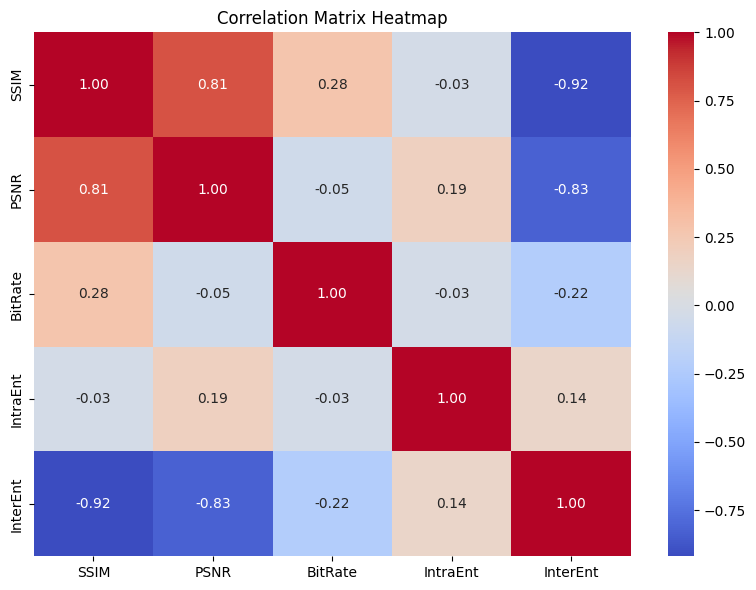

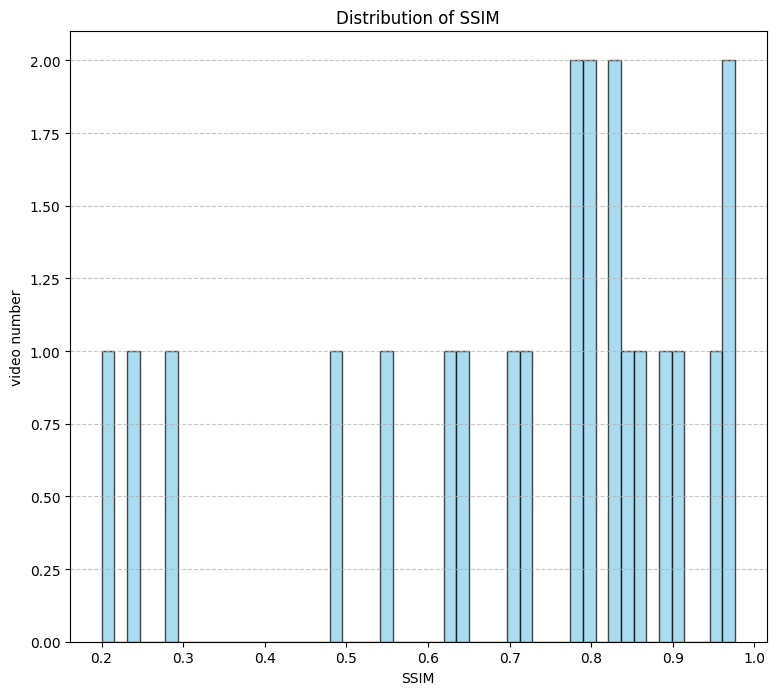

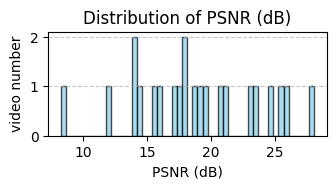

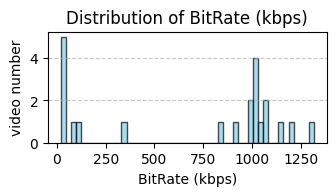

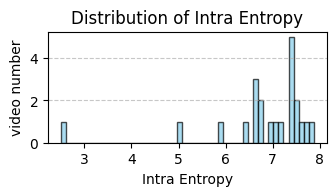

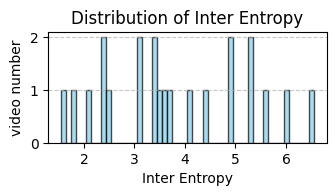

In [ ]:
import os
import torch
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import seaborn as sns  # 用于热力图绘制
import pandas as pd  # 用于数据处理

def process_tensors_and_plot(tensor_dir, output_file="output.txt"):
    # 获取所有 .pt 文件
    pt_files = [f for f in os.listdir(tensor_dir) if f.endswith(".pt")]

    if not pt_files:
        print("没有找到任何 .pt 文件。请检查 tensor_dir 路径是否正确。")
        return

    # 存储结果
    results = []

    with open(output_file, "w") as f:
        for pt_file in tqdm(pt_files, desc="处理 .pt 文件"):
            # 加载 tensor
            tensor_path = os.path.join(tensor_dir, pt_file)
            try:
                input_tensor = torch.load(tensor_path, weights_only=False)
                input_tensor = input_tensor.unsqueeze(0)
            except Exception as e:
                print(f"加载 {tensor_path} 失败: {e}")
                continue

            # 假设 compute_tile_metrics 函数返回五个指标
            print(f"处理 {tensor_path} ...")
            ssim_val, psnr_val, bitrate_val, avg_intra_entropy, avg_inter_entropy = compute_tile_metrics(input_tensor, fps=15)

            # 写入文件
            f.write(
                f"{tensor_path}\n"
                f"  SSIM: {ssim_val:.4f}, PSNR: {psnr_val:.2f} dB\n"
                f"  BitRate: {bitrate_val:.2f} kbps\n"
                f"  IntraEntropy: {avg_intra_entropy:.2f}, InterEntropy: {avg_inter_entropy:.2f}\n\n"
            )

            # 保存结果
            results.append((pt_file, ssim_val, psnr_val, bitrate_val, avg_intra_entropy, avg_inter_entropy))

    if not results:
        print("没有有效的结果可供绘图。")
        return

    # 转换结果为 DataFrame，便于后续处理和绘图
    df = pd.DataFrame(results, columns=["Filename", "SSIM", "PSNR_dB", "BitRate_kbps", "IntraEntropy", "InterEntropy"])

    # 计算相关性矩阵
    corr_matrix = df[["SSIM", "PSNR_dB", "BitRate_kbps", "IntraEntropy", "InterEntropy"]].corr()

    # 绘制指标随视频数量变化的趋势图
    plt.figure(figsize=(12, 25))
    metrics = {
        "SSIM": "SSIM",
        "PSNR (dB)": "PSNR_dB",
        "BitRate (kbps)": "BitRate_kbps",
        "Intra Entropy": "IntraEntropy",
        "Inter Entropy": "InterEntropy"
    }

    # 绘制相关性矩阵热力图
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f",
                xticklabels=["SSIM", "PSNR", "BitRate", "IntraEnt", "InterEnt"],
                yticklabels=["SSIM", "PSNR", "BitRate", "IntraEnt", "InterEnt"],
                cmap="coolwarm", cbar=True)
    plt.title("Correlation Matrix Heatmap")
    plt.tight_layout()
    plt.show()

    # 绘制每个指标的分布直方图
    histogram_metrics = {
        "SSIM": "SSIM",
        "PSNR (dB)": "PSNR_dB",
        "BitRate (kbps)": "BitRate_kbps",
        "Intra Entropy": "IntraEntropy",
        "Inter Entropy": "InterEntropy"
    }

    num_metrics = len(histogram_metrics)
    cols = 2
    rows = (num_metrics + 1) // cols

    for idx, (label, column) in enumerate(histogram_metrics.items(), 1):
        plt.figure(figsize=(15, 20))
        plt.subplot(rows, cols, idx)
        plt.hist(df[column], bins=50, edgecolor="black", alpha=0.7, color='skyblue')
        plt.xlabel(label)
        plt.ylabel("video number")
        plt.title(f"Distribution of {label}")
        plt.grid(axis="y", linestyle="--", alpha=0.7)
        plt.tight_layout()
        plt.show()

In [ ]:
# 指定 tensor 文件夹路径
tensor_dir = "/home/hanling/HunyuanVideo_efficiency/video_data/15hz_480p_tensors"
process_tensors_and_plot(tensor_dir, output_file="15hz_480p_output.txt")

In [ ]:
# 指定 tensor 文件夹路径
tensor_dir = "/home/hanling/HunyuanVideo_efficiency/video_data/30hz_480p_tensors"
process_tensors_and_plot(tensor_dir, output_file="15hz_480p_output.txt")

In [2]:
import torch
a = torch.load("/home/hanling/HunyuanVideo_efficiency/video_data/120hz_720p_videos/books-120fps-360-1920x1080.mp4")
print(a.shape)

/tmp/ipykernel_2003406/1781886309.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  a = torch.load("/home/hanling/HunyuanVideo_efficiency/video_data/120hz_original_tensors

torch.Size([3, 1200, 1080, 1920])


In [33]:
import pandas as pd
import os
import re

# 读取并解析原始数据
base_root = "/home/hanling/HunyuanVideo_efficiency/video_data/video_data_100_240p_tensor"
data = []
current_file = None

with open("/home/hanling/HunyuanVideo_efficiency/output.txt") as f:
    lines = f.readlines()
    
    for line in lines:
        line = line.strip()
        # 匹配pt文件行
        if re.match(r'^[\w_]+\.pt$', line):
            current_file = line
        elif line.startswith("SSIM"):
            # 解析SSIM和PSNR
            ssim = float(re.search(r'SSIM: ([\d.]+)', line).group(1))
            psnr = float(re.search(r'PSNR: ([\d.]+)', line).group(1))
        elif line.startswith("BitRate"):
            bitrate = float(re.search(r'BitRate: ([\d.]+)', line).group(1))
        elif line.startswith("IntraEntropy"):
            intra = float(re.search(r'IntraEntropy: ([\d.]+)', line).group(1))
            inter = float(re.search(r'InterEntropy: ([\d.]+)', line).group(1))
            # 添加完整记录
            data.append({
                "path": os.path.join(base_root, current_file),
                "SSIM": ssim,
                "PSNR": psnr,
                "BitRate": bitrate,
                "IntraEntropy": intra,
                "InterEntropy": inter
            })

df = pd.DataFrame(data)

# 定义各指标的分桶策略
bucket_config = {
    "SSIM": {
        "bins": [0, 0.5, 0.7, 0.85, 0.95, 1.0],
        "labels": [
            "Very_Low_SSIM_lt0.5", 
            "Low_SSIM_0.5-0.7", 
            "Medium_SSIM_0.7-0.85", 
            "High_SSIM_0.85-0.95", 
            "Very_High_SSIM_gt0.95"
        ]
    },
    "PSNR": {
        "bins": [0, 20, 25, 30, 35, float("inf")],
        "labels": [
            "Very_Low_PSNR_lt20dB",
            "Low_PSNR_20-25dB",
            "Medium_PSNR_25-30dB",
            "High_PSNR_30-35dB",
            "Very_High_PSNR_gt35dB"
        ]
    },
    "BitRate": {
        "bins": [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, float("inf")],
        "labels": [
            "Low_BitRate_lt500kbps",
            "Medium-Low_BitRate_500-1000kbps",
            "Medium_BitRate_1000-1500kbps",
            "Medium_BitRate_1500-2000kbps",
            "High_BitRate_2000-2500kbps",
            "High_BitRate_2500-3000kbps",
            "High_BitRate_3000-3500kbps",
            "High_BitRate_3500-4000kbps",
            "Ultra_High_BitRate_gt4000kbps"
        ]
    },
    "IntraEntropy": {
        "bins": [6.0, 6.5, 7.0, 7.5, float("inf")],
        "labels": [
            "Low_IntraEntropy_lt6.5",
            "Medium_IntraEntropy_6.5-7.0",
            "High_IntraEntropy_7.0-7.5",
            "Very_High_IntraEntropy_gt7.5"
        ]
    },
    "InterEntropy": {
        "bins": [0, 2, 4, 6, float("inf")],
        "labels": [
            "Very_Low_InterEntropy_lt2",
            "Low_InterEntropy_2-4",
            "Medium_InterEntropy_4-6",
            "High_InterEntropy_gt6"
        ]
    }
}

# 为每个指标创建分桶
for metric, config in bucket_config.items():
    df[f"{metric}_bucket"] = pd.cut(
        df[metric],
        bins=config["bins"],
        labels=config["labels"],
        right=False if metric == "BitRate" else True  # BitRate使用左闭右开
    )

# 创建输出目录
output_dir = "metric_buckets"
os.makedirs(output_dir, exist_ok=True)

# 为每个指标保存分桶结果
for metric in bucket_config.keys():
    metric_dir = os.path.join(output_dir, f"{metric}_buckets")
    os.makedirs(metric_dir, exist_ok=True)
    
    # 获取该指标的所有分桶标签
    labels = bucket_config[metric]["labels"]
    
    for label in labels:
        # 清理标签中的特殊字符
        clean_label = re.sub(r'[<>()]', '', label.replace(' ', '_'))
        bucket_files = df[df[f"{metric}_bucket"] == label]["path"]
        
        if not bucket_files.empty:
            output_path = os.path.join(metric_dir, f"{clean_label}.txt")
            bucket_files.to_csv(output_path, index=False, header=False)
            print(f"✅ [{metric}] 已保存 {len(bucket_files)} 个视频到 {output_path}")

print("\n🎉 全部分桶完成！")

✅ [SSIM] 已保存 1 个视频到 metric_buckets/SSIM_buckets/Very_Low_SSIM_lt0.5.txt
✅ [SSIM] 已保存 5 个视频到 metric_buckets/SSIM_buckets/Low_SSIM_0.5-0.7.txt
✅ [SSIM] 已保存 11 个视频到 metric_buckets/SSIM_buckets/Medium_SSIM_0.7-0.85.txt
✅ [SSIM] 已保存 30 个视频到 metric_buckets/SSIM_buckets/High_SSIM_0.85-0.95.txt
✅ [SSIM] 已保存 53 个视频到 metric_buckets/SSIM_buckets/Very_High_SSIM_gt0.95.txt
✅ [PSNR] 已保存 13 个视频到 metric_buckets/PSNR_buckets/Very_Low_PSNR_lt20dB.txt
✅ [PSNR] 已保存 24 个视频到 metric_buckets/PSNR_buckets/Low_PSNR_20-25dB.txt
✅ [PSNR] 已保存 19 个视频到 metric_buckets/PSNR_buckets/Medium_PSNR_25-30dB.txt
✅ [PSNR] 已保存 15 个视频到 metric_buckets/PSNR_buckets/High_PSNR_30-35dB.txt
✅ [PSNR] 已保存 29 个视频到 metric_buckets/PSNR_buckets/Very_High_PSNR_gt35dB.txt
✅ [BitRate] 已保存 50 个视频到 metric_buckets/BitRate_buckets/Low_BitRate_lt500kbps.txt
✅ [BitRate] 已保存 39 个视频到 metric_buckets/BitRate_buckets/Medium-Low_BitRate_500-1000kbps.txt
✅ [BitRate] 已保存 11 个视频到 metric_buckets/BitRate_buckets/Medium_BitRate_1000-1500kbps.txt
✅ [IntraEntrop

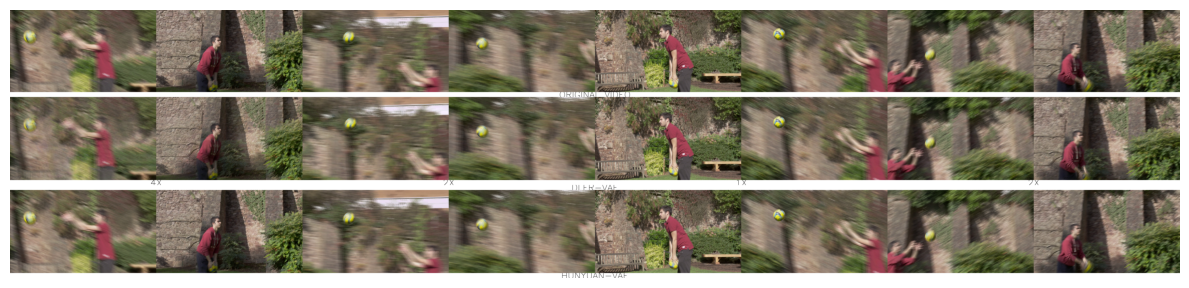

Saved final image to /home/hanling/HunyuanVideo_efficiency/paper_image/final_output_white.png


In [3]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def hconcat_no_resize(img_list, pad_color=(255,255,255)):
    """
    水平拼接一组OpenCV图像, 不进行缩放。
    若图像高度不一致, 以其中最大高度为准, 对其它图用'pad_color'填充。
    返回拼接后的大图 (numpy.ndarray, BGR格式)。
    """
    valid_imgs = [img for img in img_list if img is not None]
    if not valid_imgs:
        return None
    
    max_h = max(img.shape[0] for img in valid_imgs)
    total_w = sum(img.shape[1] for img in valid_imgs)
    
    out = np.full((max_h, total_w, 3), pad_color, dtype=np.uint8)
    current_x = 0
    for img in valid_imgs:
        h, w, _ = img.shape
        out[0:h, current_x:current_x + w] = img
        current_x += w

    return out

def vconcat_no_resize(img_list, pad_color=(255,255,255)):
    """
    垂直拼接一组OpenCV图像, 不进行缩放。
    若图像宽度不一致, 以其中最大宽度为准, 对其它图用'pad_color'填充。
    返回拼接后的大图 (numpy.ndarray, BGR格式)。
    """
    valid_imgs = [img for img in img_list if img is not None]
    if not valid_imgs:
        return None
    
    max_w = max(img.shape[1] for img in valid_imgs)
    total_h = sum(img.shape[0] for img in valid_imgs)
    
    out = np.full((total_h, max_w, 3), pad_color, dtype=np.uint8)
    current_y = 0
    for img in valid_imgs:
        h, w, _ = img.shape
        out[current_y:current_y + h, 0:w] = img
        current_y += h

    return out

def make_text_image(text, width, height, font_scale=1.5, text_color=(0,0,0), bg_color=(255,255,255)):
    """
    制作一张大小为 (height, width) 的图, 纯色背景(bg_color)，
    并用cv2.putText在中间写上 text（BGR格式）。
    """
    # 全部转成大写
    text = text.upper()

    img = np.full((height, width, 3), bg_color, dtype=np.uint8)
    font = cv2.FONT_HERSHEY_SIMPLEX
    thickness = 2
    
    text_size, _ = cv2.getTextSize(text, font, font_scale, thickness)
    text_w, text_h = text_size
    x = (width - text_w) // 2
    y = (height + text_h) // 2

    cv2.putText(img, text, (x, y), font, font_scale, text_color, thickness)
    return img

def combine_big_list(
    big_list,
    sublist_titles=None,
    big_list_title=None,
    pad_color=(255,255,255),
    font_scale=1.5,
    text_height=50
):
    """
    处理一个“大列表” (big_list)：
    - big_list 有 4 个“小列表”，每个小列表含 2 张OpenCV图像；
    - 先将每个小列表的2张图水平拼接 => 得到4张图 (sublist_imgs)；
    - 再将这4张图水平拼接 => 得到 'row_img'；
    - 若 sublist_titles 不为空，则在这一行下面加一个“标题行”(对应4段文字)；
    - 若 big_list_title 不为空，则再在最下方加一个“整体标题行”；
    - 最后返回拼接后的大图 (numpy.ndarray)。
    """
    sublist_imgs = []
    for i, subl in enumerate(big_list):
        if not isinstance(subl, list) or len(subl) < 2:
            print(f"Warning: sublist {i} invalid or fewer than 2 images.")
            sublist_imgs.append(None)
            continue
        pair_img = hconcat_no_resize(subl, pad_color=pad_color)
        sublist_imgs.append(pair_img)

    row_img = hconcat_no_resize(sublist_imgs, pad_color=pad_color)
    if row_img is None:
        print("No valid images in big_list to combine.")
        return None

    # 加子标题行(若需要)
    if sublist_titles and len(sublist_titles) == len(big_list):
        total_w = row_img.shape[1]
        text_row_segments = []
        for title, subimg in zip(sublist_titles, sublist_imgs):
            if subimg is None:
                segment_w = total_w // 4
            else:
                segment_w = subimg.shape[1]
            segment = make_text_image(
                title, width=segment_w, height=text_height,
                font_scale=font_scale, text_color=(0,0,0), bg_color=(255,255,255)
            )
            text_row_segments.append(segment)
        sublist_titles_row = hconcat_no_resize(text_row_segments, pad_color=pad_color)
        row_img = vconcat_no_resize([row_img, sublist_titles_row], pad_color=pad_color)

    # 加大列表整体标题(若需要)
    if big_list_title:
        big_row_w = row_img.shape[1]
        big_title_img = make_text_image(
            big_list_title,
            width=big_row_w,
            height=text_height,
            font_scale=font_scale,
            text_color=(0,0,0),
            bg_color=(255,255,255)
        )
        row_img = vconcat_no_resize([row_img, big_title_img], pad_color=pad_color)

    return row_img

def final_composition(big_lists, sublist_titles_lists=None, big_list_titles=None):
    """
    - big_lists: [big_list_1, big_list_2, big_list_3, ...]
    - sublist_titles_lists: 对应每个 big_list 的4个小标题 (可为 None)
    - big_list_titles: 给每个 big_list 加一个整体标题 (可为 None)
    - 返回最终拼好的大图 (OpenCV BGR格式)，背景白色。
    """
    if sublist_titles_lists is None:
        sublist_titles_lists = [None]*len(big_lists)
    if big_list_titles is None:
        big_list_titles = [None]*len(big_lists)
    
    rows = []
    for i, bl in enumerate(big_lists):
        row_img = combine_big_list(
            big_list=bl,
            sublist_titles=sublist_titles_lists[i],
            big_list_title=big_list_titles[i],
            pad_color=(255,255,255),    # 白色背景
            font_scale=1.5,            # 字体大小
            text_height=50             # 标题行高度
        )
        rows.append(row_img)
    final_img = vconcat_no_resize(rows, pad_color=(255,255,255))
    return final_img

def show_in_matplotlib(img_bgr):
    """
    用Matplotlib显示OpenCV BGR格式图像 (在Notebook或脚本皆可)。
    """
    if img_bgr is None:
        print("No image to display.")
        return
    rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(12, 6))
    plt.imshow(rgb)
    plt.axis('off')
    plt.tight_layout()
    plt.show()


# ------------- 示例调用 ------------- 
if __name__ == "__main__":
    root = "/home/hanling/HunyuanVideo_efficiency/paper_image"

    def read_cv2(path):
        img = cv2.imread(path)
        if img is None:
            print(f"Warning: failed to read {path}")
        return img

    # 构造3个大列表示例
    big_list_1 = [
        [
            read_cv2(f"{root}/catch_0_4x/bouncyball_0_30hz_8_720p_ori.png"),
            read_cv2(f"{root}/catch_0_4x/bouncyball_0_30hz_40_720p_ori.png")
        ],
        [
            read_cv2(f"{root}/catch_1_2x/catch_1_30hz_3_720p_ori.png"),
            read_cv2(f"{root}/catch_1_2x/catch_1_30hz_40_720p_ori.png")
        ],
        [
            read_cv2(f"{root}/catch_2_1x/catch_1_30hz_43_720p_ori.png"),
            read_cv2(f"{root}/catch_2_1x/catch_1_30hz_57_720p_ori.png")
        ],
        [
            read_cv2(f"{root}/catch_3_2x/catch_3_30hz_8_720p_ori.png"),
            read_cv2(f"{root}/catch_3_2x/catch_3_30hz_27_720p_ori.png")
        ],
    ]
    big_list_2 = [
        [
            read_cv2(f"{root}/catch_0_4x/bouncyball_0_30hz_8_720p_4x.png"),
            read_cv2(f"{root}/catch_0_4x/bouncyball_0_30hz_40_720p_4x.png")
        ],
        [
            read_cv2(f"{root}/catch_1_2x/catch_1_30hz_3_720p_2x.png"),
            read_cv2(f"{root}/catch_1_2x/catch_1_30hz_40_720p_2x.png")
        ],
        [
            read_cv2(f"{root}/catch_2_1x/catch_1_30hz_43_720p_1x.png"),
            read_cv2(f"{root}/catch_2_1x/catch_1_30hz_57_720p_1x.png")
        ],
        [
            read_cv2(f"{root}/catch_3_2x/catch_3_30hz_8_720p_2x.png"),
            read_cv2(f"{root}/catch_3_2x/catch_3_30hz_27_720p_2x.png")
        ],
    ]
    big_list_3 = [
        [
            read_cv2(f"{root}/catch_0_4x/bouncyball_0_30hz_8_720p_1x.png"),
            read_cv2(f"{root}/catch_0_4x/bouncyball_0_30hz_40_720p_1x.png")
        ],
        [
            read_cv2(f"{root}/catch_1_2x/catch_1_30hz_3_720p_1x.png"),
            read_cv2(f"{root}/catch_1_2x/catch_1_30hz_40_720p_1x.png")
        ],
        [
            read_cv2(f"{root}/catch_2_1x/catch_1_30hz_43_720p_1x.png"),
            read_cv2(f"{root}/catch_2_1x/catch_1_30hz_57_720p_1x.png")
        ],
        [
            read_cv2(f"{root}/catch_3_2x/catch_3_30hz_8_720p_1x.png"),
            read_cv2(f"{root}/catch_3_2x/catch_3_30hz_27_720p_1x.png")
        ],
    ]

    # 小列表的标题 (第二行演示)
    sublist_titles_1 = []
    sublist_titles_2 = ["4x", "2x", "1x", "2x"]
    sublist_titles_3 = []

    # 大列表整体标题
    big_title_1 = "Original Video"
    big_title_2 = "DLFR-VAE"
    big_title_3 = "Hunyuan-VAE"

    big_lists = [big_list_1, big_list_2, big_list_3]
    sublist_titles_lists = [sublist_titles_1, sublist_titles_2, sublist_titles_3]
    big_list_titles = [big_title_1, big_title_2, big_title_3]

    # 拼接
    final_img = final_composition(big_lists, sublist_titles_lists, big_list_titles)

    # 用matplotlib显示
    if final_img is not None:
        show_in_matplotlib(final_img)

        # 如需保存文件:
        out_path = os.path.join(root, "final_output_white.png")
        cv2.imwrite(out_path, final_img)
        print(f"Saved final image to {out_path}")
    else:
        print("No final image generated.")


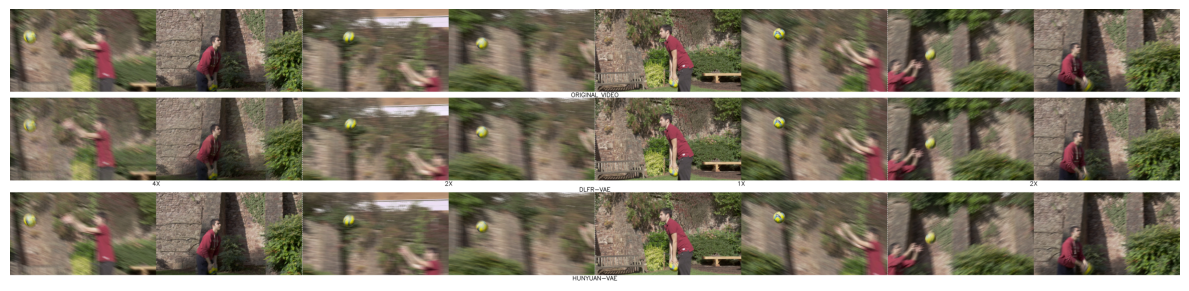

Saved to /home/hanling/HunyuanVideo_efficiency/paper_image/final_output_dashed.png


In [7]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def create_vertical_dashed_line(height, line_width=10, dash_size=10, 
                                fg_color=(0,0,0), bg_color=(255,255,255)):
    """
    创建一张高为 height、宽为 line_width 的"竖直虚线"图。
    fg_color: 虚线的颜色 (BGR)
    bg_color: 背景色 (BGR)
    dash_size: 控制虚线点/段的高度。
    """
    # 先全部填充bg_color(白色)
    line_img = np.full((height, line_width, 3), bg_color, dtype=np.uint8)
    # 逐段填充黑色(或者别的颜色)
    toggle = True
    y = 0
    while y < height:
        # 每次画 dash_size 高度
        segment_end = min(y + dash_size, height)
        if toggle:
            # 填充这段为 fg_color
            line_img[y:segment_end, :] = fg_color
        # 翻转
        toggle = not toggle
        y = segment_end
    return line_img

def create_white_spacing(height, width=20, bg_color=(255,255,255)):
    """
    创建一张纯白的(或bg_color)小图，大小= (height x width)，
    用于在拼接时增加空白缝隙。
    """
    return np.full((height, width, 3), bg_color, dtype=np.uint8)

def hconcat_with_lines(img_list, 
                       pad_color=(255,255,255), 
                       use_dashed_line=True, 
                       line_width=10, 
                       dash_size=10,
                       spacing_width=20):
    """
    水平拼接一组图像，图像间插入:
      - 一段纯白空白 (spacing)
      - 一条竖直虚线 (dashed line)
    以实现更大的缝隙和虚线分割。
    
    如果你希望没有虚线，只想加空白，可把use_dashed_line=False。
    """
    valid_imgs = [img for img in img_list if img is not None]
    if not valid_imgs:
        return None

    # 找到最大高度
    max_h = max(img.shape[0] for img in valid_imgs)
    
    # 准备"结果列表"来做 hconcat
    # 形如 [img1, spacing, dashed_line, img2, spacing, dashed_line, img3, ...]
    to_concat = []
    for i, img in enumerate(valid_imgs):
        # 先把图放进去
        to_concat.append(img)
        if i < len(valid_imgs)-1:
            # 在非最后一个图后面，插入空白 + 虚线
            if spacing_width > 0:
                space_img = create_white_spacing(max_h, spacing_width, pad_color)
                to_concat.append(space_img)
            if use_dashed_line:
                dashed = create_vertical_dashed_line(
                    height=max_h,
                    line_width=line_width,
                    dash_size=dash_size,
                    fg_color=(0,0,0),    # 虚线颜色(黑)
                    bg_color=pad_color   # 背景色(白)
                )
                to_concat.append(dashed)
    
    # 现在把 to_concat 做一次真正的 hconcat_no_resize
    return hconcat_no_resize(to_concat, pad_color=pad_color)


def hconcat_no_resize(img_list, pad_color=(255,255,255)):
    """
    最原始的水平拼接, 不进行缩放, 对高度不一致做白边补齐.
    """
    valid_imgs = [img for img in img_list if img is not None]
    if not valid_imgs:
        return None
    
    max_h = max(img.shape[0] for img in valid_imgs)
    total_w = sum(img.shape[1] for img in valid_imgs)
    
    out = np.full((max_h, total_w, 3), pad_color, dtype=np.uint8)
    current_x = 0
    for img in valid_imgs:
        h, w, _ = img.shape
        out[0:h, current_x:current_x + w] = img
        current_x += w
    return out

def vconcat_no_resize(img_list, pad_color=(255,255,255)):
    """
    垂直拼接一组OpenCV图像, 不缩放. 对宽度不一致做白边补齐.
    """
    valid_imgs = [img for img in img_list if img is not None]
    if not valid_imgs:
        return None
    
    max_w = max(img.shape[1] for img in valid_imgs)
    total_h = sum(img.shape[0] for img in valid_imgs)
    
    out = np.full((total_h, max_w, 3), pad_color, dtype=np.uint8)
    current_y = 0
    for img in valid_imgs:
        h, w, _ = img.shape
        out[current_y:current_y + h, 0:w] = img
        current_y += h
    return out

def make_text_image(text, width, height, font_scale=2.0, text_color=(0,0,0), bg_color=(255,255,255)):
    """
    生成一张 (height, width) 大小、背景为bg_color, 中间写上 text(大写).
    字体放大到 2.0, 你也可再调大.
    """
    text = text.upper()
    img = np.full((height, width, 3), bg_color, dtype=np.uint8)
    font = cv2.FONT_HERSHEY_SIMPLEX
    thickness = 3  # 字迹更粗
    text_size, _ = cv2.getTextSize(text, font, font_scale, thickness)
    text_w, text_h = text_size
    x = (width - text_w) // 2
    y = (height + text_h) // 2
    cv2.putText(img, text, (x, y), font, font_scale, text_color, thickness)
    return img

def combine_big_list(
    big_list,
    sublist_titles=None,
    big_list_title=None,
    pad_color=(255,255,255),
    font_scale=2.0,
    text_height=60,
    use_dashed_line=True,    # 是否在每个小列表间插入虚线
    line_width=10,
    dash_size=10,
    spacing_width=20
):
    """
    对一个大列表(含4个小列表, 每个小列表=2张图):
      - 先把小列表的2张图做最简单的 hconcat_no_resize => pair_img
      - 收集4个 pair_img => row_imgs
      - 用 hconcat_with_lines(...) 把4张 pair_img 拼接成一行 (中间插入虚线+空白)
      - 如果有 sublist_titles => 在这一行下面再加一个标题行
      - 如果有 big_list_title => 在最后再加一个整行标题
      - 返回最终拼接好的图像
    """
    sublist_imgs = []
    for i, subl in enumerate(big_list):
        if not isinstance(subl, list) or len(subl) < 2:
            print(f"Warning: sublist {i} invalid or fewer than 2 images.")
            sublist_imgs.append(None)
            continue
        pair_img = hconcat_no_resize(subl, pad_color=pad_color)
        sublist_imgs.append(pair_img)

    # 用我们新定义的 hconcat_with_lines 来水平拼接4个 pair_img
    row_img = hconcat_with_lines(sublist_imgs,
                                 pad_color=pad_color,
                                 use_dashed_line=use_dashed_line,
                                 line_width=line_width,
                                 dash_size=dash_size,
                                 spacing_width=spacing_width)
    if row_img is None:
        return None

    # 如果需要对4个小列表显示子标题
    if sublist_titles and len(sublist_titles) == len(big_list):
        total_w = row_img.shape[1]
        text_row_segments = []
        # 注意: sublist_imgs[i] 并不一定跟 row_img 里严格宽度对应(因为插入了虚线)
        # 这里我们简单平均分成4份, 或者自己做更复杂计算. 下面采用简单法:
        segment_w = total_w // len(big_list)
        for title in sublist_titles:
            seg = make_text_image(title, width=segment_w, height=text_height,
                                  font_scale=font_scale, text_color=(0,0,0), bg_color=pad_color)
            text_row_segments.append(seg)
        sublist_titles_row = hconcat_no_resize(text_row_segments, pad_color=pad_color)
        row_img = vconcat_no_resize([row_img, sublist_titles_row], pad_color=pad_color)

    # 如果需要加大列表总标题
    if big_list_title:
        big_row_w = row_img.shape[1]
        big_title_img = make_text_image(big_list_title, width=big_row_w, height=text_height,
                                        font_scale=font_scale, text_color=(0,0,0), bg_color=pad_color)
        row_img = vconcat_no_resize([row_img, big_title_img], pad_color=pad_color)

    return row_img

def final_composition(
    big_lists,
    sublist_titles_lists=None,
    big_list_titles=None,
    font_scale=2.0,
    text_height=60,
    use_dashed_line=True,
    line_width=10,
    dash_size=10,
    spacing_width=20
):
    """
    将多个大列表(可3个或更多)拼成多行. 
    每行由 combine_big_list(...) 产生(中间带虚线, 较大字体, 白背景).
    """
    if sublist_titles_lists is None:
        sublist_titles_lists = [None]*len(big_lists)
    if big_list_titles is None:
        big_list_titles = [None]*len(big_lists)
    
    rows = []
    for i, bl in enumerate(big_lists):
        row_img = combine_big_list(
            big_list=bl,
            sublist_titles=sublist_titles_lists[i],
            big_list_title=big_list_titles[i],
            pad_color=(255,255,255),
            font_scale=font_scale,
            text_height=text_height,
            use_dashed_line=use_dashed_line,
            line_width=line_width,
            dash_size=dash_size,
            spacing_width=spacing_width
        )
        rows.append(row_img)
    final_img = vconcat_no_resize(rows, pad_color=(255,255,255))
    return final_img

def show_in_matplotlib(img_bgr):
    """
    用Matplotlib显示OpenCV BGR格式图像 (适用于Jupyter/脚本, 不依赖cv2.imshow).
    """
    if img_bgr is None:
        print("No image to display.")
        return
    rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(12, 8))
    plt.imshow(rgb)
    plt.axis('off')
    plt.tight_layout()
    plt.show()


# ------------------ 测试示例 ------------------ 
if __name__ == "__main__":
    root = "/home/hanling/HunyuanVideo_efficiency/paper_image"

    def read_cv2(path):
        img = cv2.imread(path)
        if img is None:
            print(f"Warning: failed to read {path}")
        return img

    # big_list_1, big_list_2, big_list_3...
    # 在此仅做示例: 自行修改路径
    big_list_1 = [
        [read_cv2(f"{root}/catch_0_4x/bouncyball_0_30hz_8_720p_ori.png"),
         read_cv2(f"{root}/catch_0_4x/bouncyball_0_30hz_40_720p_ori.png")],
        [read_cv2(f"{root}/catch_1_2x/catch_1_30hz_3_720p_ori.png"),
         read_cv2(f"{root}/catch_1_2x/catch_1_30hz_40_720p_ori.png")],
        [read_cv2(f"{root}/catch_2_1x/catch_1_30hz_43_720p_ori.png"),
         read_cv2(f"{root}/catch_2_1x/catch_1_30hz_57_720p_ori.png")],
        [read_cv2(f"{root}/catch_3_2x/catch_3_30hz_8_720p_ori.png"),
         read_cv2(f"{root}/catch_3_2x/catch_3_30hz_27_720p_ori.png")],
    ]
    big_list_2 = [
        [read_cv2(f"{root}/catch_0_4x/bouncyball_0_30hz_8_720p_4x.png"),
         read_cv2(f"{root}/catch_0_4x/bouncyball_0_30hz_40_720p_4x.png")],
        [read_cv2(f"{root}/catch_1_2x/catch_1_30hz_3_720p_2x.png"),
         read_cv2(f"{root}/catch_1_2x/catch_1_30hz_40_720p_2x.png")],
        [read_cv2(f"{root}/catch_2_1x/catch_1_30hz_43_720p_1x.png"),
         read_cv2(f"{root}/catch_2_1x/catch_1_30hz_57_720p_1x.png")],
        [read_cv2(f"{root}/catch_3_2x/catch_3_30hz_8_720p_2x.png"),
         read_cv2(f"{root}/catch_3_2x/catch_3_30hz_27_720p_2x.png")],
    ]
    big_list_3 = [
        [read_cv2(f"{root}/catch_0_4x/bouncyball_0_30hz_8_720p_1x.png"),
         read_cv2(f"{root}/catch_0_4x/bouncyball_0_30hz_40_720p_1x.png")],
        [read_cv2(f"{root}/catch_1_2x/catch_1_30hz_3_720p_1x.png"),
         read_cv2(f"{root}/catch_1_2x/catch_1_30hz_40_720p_1x.png")],
        [read_cv2(f"{root}/catch_2_1x/catch_1_30hz_43_720p_1x.png"),
         read_cv2(f"{root}/catch_2_1x/catch_1_30hz_57_720p_1x.png")],
        [read_cv2(f"{root}/catch_3_2x/catch_3_30hz_8_720p_1x.png"),
         read_cv2(f"{root}/catch_3_2x/catch_3_30hz_27_720p_1x.png")],
    ]

    # 子标题示例
    sublist_titles_1 = []  # 无标题
    sublist_titles_2 = ["4x", "2x", "1x", "2x"]  # 示例
    sublist_titles_3 = []

    # 大列表标题
    big_titles = ["Original Video", "DLFR-VAE", "Hunyuan-VAE"]

    big_lists = [big_list_1, big_list_2, big_list_3]
    sub_titles = [sublist_titles_1, sublist_titles_2, sublist_titles_3]

    # 调用 final_composition 
    final_img = final_composition(
        big_lists,
        sub_titles,
        big_titles,
        font_scale=2.0,     # 更大的文字
        text_height=60,     # 标题行更高
        use_dashed_line=True,  # 打开虚线
        line_width=2,      # 虚线宽度
        dash_size=10,       # 虚线每段高度
        spacing_width=2    # 图片之间的额外白色空隙
    )

    # 显示结果(不依赖GUI)
    if final_img is not None:
        show_in_matplotlib(final_img)
        # 若要保存
        out_path = os.path.join(root, "final_output_dashed.png")
        cv2.imwrite(out_path, final_img)
        print(f"Saved to {out_path}")
    else:
        print("No final image generated.")


In [197]:
import cv2
import matplotlib.pyplot as plt

def extract_and_save_frame(video_path, frame_number, output_path="extracted_frame.png", save_image=True):
    """
    从视频中提取指定帧并保存，同时显示图像（无白边）。
    
    参数:
        video_path (str): 视频文件路径
        frame_number (int): 需要提取的帧号（从 0 开始）
        output_path (str): 保存提取帧的路径（默认 "extracted_frame.png"）
        save_image (bool): 是否保存图像，默认为 True
    
    返回:
        bool: 是否成功提取并保存帧
    """
    # 打开视频文件
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print("Error: Cannot open video file.")
        return False

    # 设置视频帧位置
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)

    # 读取指定帧
    ret, frame = cap.read()
    cap.release()  # 释放视频文件

    if ret:
        # 转换颜色格式 (BGR -> RGB) 以便 Matplotlib 正确显示
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # 创建无边框的图像
        fig, ax = plt.subplots(figsize=(frame.shape[1] / 100, frame.shape[0] / 100), dpi=100)
        ax.imshow(frame_rgb)
        ax.set_xticks([])  # 去掉 x 轴刻度
        ax.set_yticks([])  # 去掉 y 轴刻度
        ax.set_frame_on(False)  # 去掉边框

        # 显示图像
        plt.show()

        # 根据开关决定是否保存图片
        if save_image:
            fig.savefig(output_path, bbox_inches='tight', pad_inches=0, transparent=True)
            print(f"Frame {frame_number} saved as {output_path}")

        plt.close(fig)  # 关闭 Matplotlib 以释放内存
        return True
    else:
        print(f"Error: Unable to read frame {frame_number}")
        return False





# 示例调用
save_flag = True
frame_to_extract = 56
paper_image = "/home/hanling/HunyuanVideo_efficiency/paper_image"



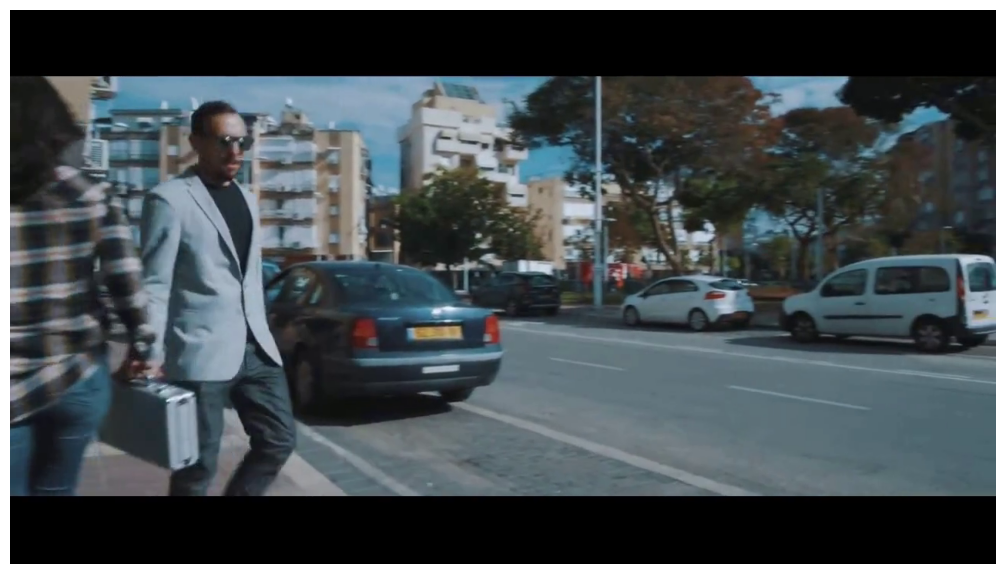

Frame 56 saved as /home/hanling/HunyuanVideo_efficiency/paper_image/frame_56_label.png


True

In [198]:
output_image = f"{paper_image}/frame_{frame_to_extract}_label.png"
video_file = "/home/hanling/HunyuanVideo_efficiency/analysis/15hz_720p_reconstructed_large_motion_1x_label/walk|3|0.0|.mp4"
extract_and_save_frame(video_file, frame_to_extract, output_image, save_image=save_flag)

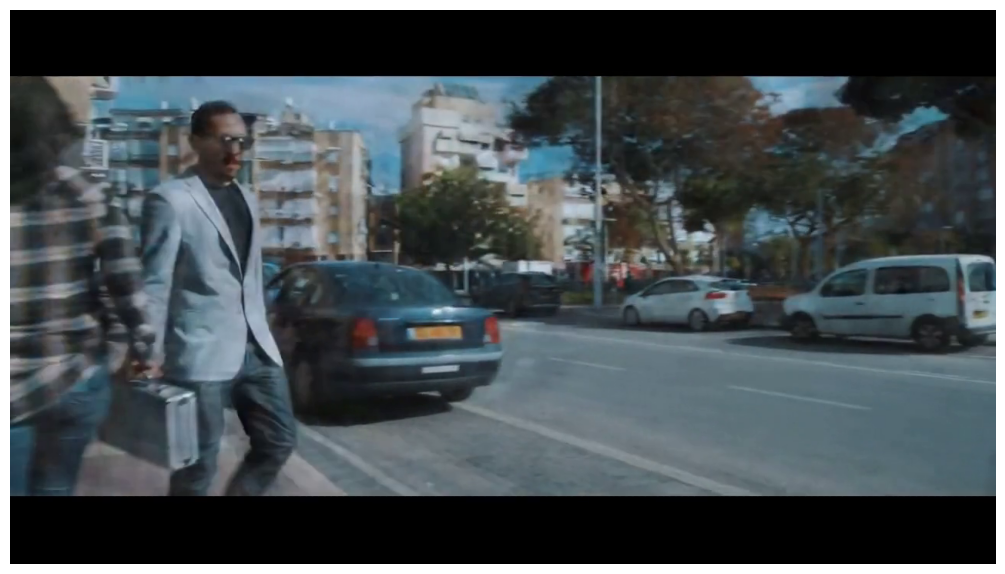

Frame 56 saved as /home/hanling/HunyuanVideo_efficiency/paper_image/frame_56_4x.png


True

In [199]:
output_image = f"{paper_image}/frame_{frame_to_extract}_4x.png"
video_file = "/home/hanling/HunyuanVideo_efficiency/analysis/15hz_720p_reconstructed_large_motion_4x/walk|3|0.0|.mp4"
extract_and_save_frame(video_file, frame_to_extract, output_image, save_image=save_flag)

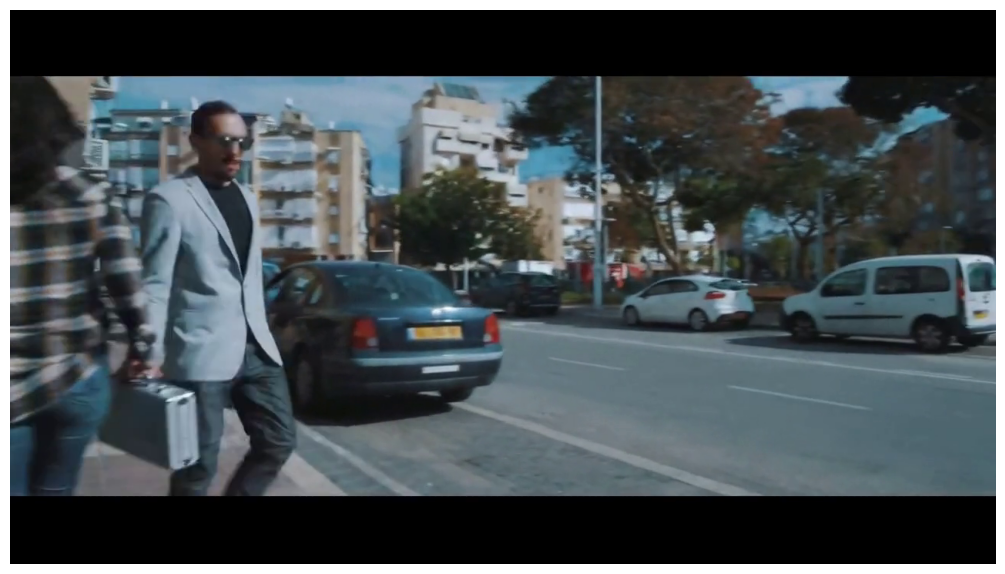

Frame 56 saved as /home/hanling/HunyuanVideo_efficiency/paper_image/frame_56_2x.png


True

In [200]:
output_image = f"{paper_image}/frame_{frame_to_extract}_2x.png"
video_file = "/home/hanling/HunyuanVideo_efficiency/analysis/15hz_720p_reconstructed_large_motion_2x/walk|3|0.0|.mp4"
extract_and_save_frame(video_file, frame_to_extract, output_image, save_image=save_flag)

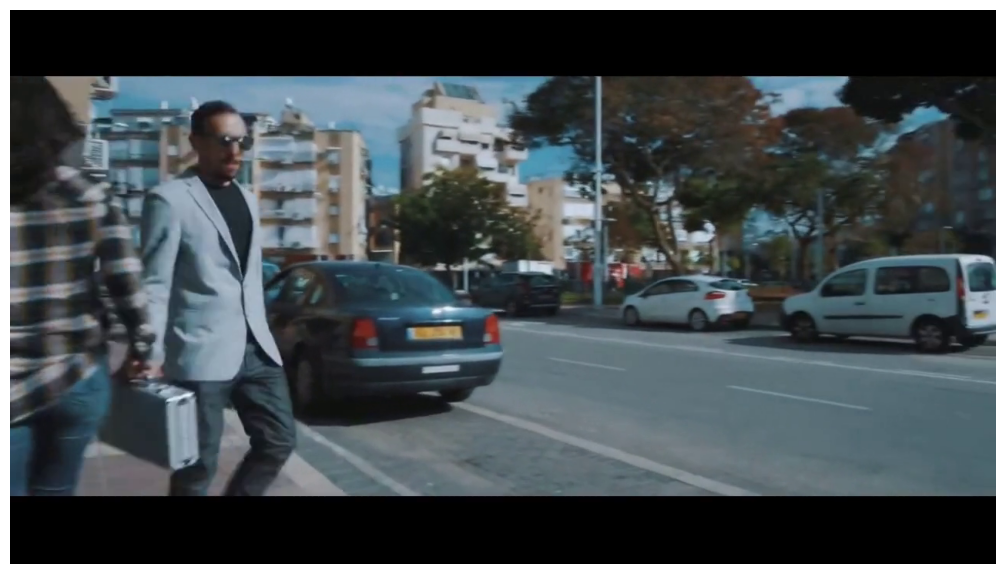

Frame 56 saved as /home/hanling/HunyuanVideo_efficiency/paper_image/frame_56_1x.png


True

In [201]:
output_image = f"{paper_image}/frame_{frame_to_extract}_1x.png"
video_file = "/home/hanling/HunyuanVideo_efficiency/analysis/15hz_720p_reconstructed_large_motion_1x/walk|3|0.0|.mp4"
extract_and_save_frame(video_file, frame_to_extract, output_image, save_image=save_flag)